# Data Analyst & Data Engineer

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
# Download latest version
path = kagglehub.dataset_download("lucasgreenwell/depression-anxiety-stress-scales-responses")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/depression-anxiety-stress-scales-responses


In [ ]:
data_file_path = f"{path}/data.csv"

df = pd.read_csv(data_file_path, sep='\t')
df.head()

Q1A  Q1I   Q1E  Q2A  Q2I   Q2E  Q3A  Q3I   Q3E  Q4A  ...  screensize  \
0    4   28  3890    4   25  2122    2   16  1944    4  ...           1   
1    4    2  8118    1   36  2890    2   35  4777    3  ...           2   
2    3    7  5784    1   33  4373    4   41  3242    1  ...           2   
3    2   23  5081    3   11  6837    2   37  5521    1  ...           2   
4    2   36  3215    2   13  7731    3    5  4156    4  ...           2   

   uniquenetworklocation  hand  religion  orientation  race  voted  married  \
0                      1     1        12            1    10      2        1   
1                      1     2         7            0    70      2        1   
2                      1     1         4            3    60      1        1   
3                      1     2         4            5    70      2        1   
4                      2     3        10            1    10      2        1   

   familysize       major  
0           2         NaN  
1           4         NaN  
2           3         NaN  
3           5     biology  
4           4  Psychology  

[5 rows x 172 columns]

In [ ]:
df.info()
df.shape
print("Header Kolom : ", df.columns.to_list())
print("Jumlah Kolom : ", len(df.columns))
print("Jumlah Responden : ", len(df))
print("Jumlah Data Kosong Keseluruhan : ", len(df[df.isnull().any(axis=1)]))
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Columns: 172 entries, Q1A to major
dtypes: int64(170), object(2)
memory usage: 52.2+ MB
Header Kolom :  ['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A', 'Q4I', 'Q4E', 'Q5A', 'Q5I', 'Q5E', 'Q6A', 'Q6I', 'Q6E', 'Q7A', 'Q7I', 'Q7E', 'Q8A', 'Q8I', 'Q8E', 'Q9A', 'Q9I', 'Q9E', 'Q10A', 'Q10I', 'Q10E', 'Q11A', 'Q11I', 'Q11E', 'Q12A', 'Q12I', 'Q12E', 'Q13A', 'Q13I', 'Q13E', 'Q14A', 'Q14I', 'Q14E', 'Q15A', 'Q15I', 'Q15E', 'Q16A', 'Q16I', 'Q16E', 'Q17A', 'Q17I', 'Q17E', 'Q18A', 'Q18I', 'Q18E', 'Q19A', 'Q19I', 'Q19E', 'Q20A', 'Q20I', 'Q20E', 'Q21A', 'Q21I', 'Q21E', 'Q22A', 'Q22I', 'Q22E', 'Q23A', 'Q23I', 'Q23E', 'Q24A', 'Q24I', 'Q24E', 'Q25A', 'Q25I', 'Q25E', 'Q26A', 'Q26I', 'Q26E', 'Q27A', 'Q27I', 'Q27E', 'Q28A', 'Q28I', 'Q28E', 'Q29A', 'Q29I', 'Q29E', 'Q30A', 'Q30I', 'Q30E', 'Q31A', 'Q31I', 'Q31E', 'Q32A', 'Q32I', 'Q32E', 'Q33A', 'Q33I', 'Q33E', 'Q34A', 'Q34I', 'Q34E', 'Q35A', 'Q35I', 'Q35E', 'Q36A'

Q1A           Q1I           Q1E           Q2A           Q2I  \
count  39775.000000  39775.000000  3.977500e+04  39775.000000  39775.000000   
mean       2.619485     21.555977  6.970591e+03      2.172269     21.248070   
std        1.032117     12.133621  8.670513e+04      1.111563     12.125288   
min        1.000000      1.000000  1.800000e+02      1.000000      1.000000   
25%        2.000000     11.000000  2.664000e+03      1.000000     11.000000   
50%        3.000000     22.000000  3.609000e+03      2.000000     21.000000   
75%        4.000000     32.000000  5.358000e+03      3.000000     32.000000   
max        4.000000     42.000000  1.210228e+07      4.000000     42.000000   

                Q2E           Q3A           Q3I           Q3E           Q4A  \
count  3.977500e+04  39775.000000  39775.000000  3.977500e+04  39775.000000   
mean   5.332376e+03      2.226097     21.583004  7.426446e+03      1.950170   
std    2.651361e+04      1.038526     12.115637  1.587024e+05      1.042218   
min    1.760000e+02      1.000000      1.000000 -1.081400e+04      1.000000   
25%    2.477000e+03      1.000000     11.000000  2.857000e+03      1.000000   
50%    3.511000e+03      2.000000     22.000000  3.898000e+03      2.000000   
75%    5.216000e+03      3.000000     32.000000  5.766000e+03      3.000000   
max    2.161057e+06      4.000000     42.000000  2.858269e+07      4.000000   

       ...           age    screensize  uniquenetworklocation         hand  \
count  ...  39775.000000  39775.000000           39775.000000  39775.00000   
mean   ...     23.612168      1.274519               1.200025      1.13516   
std    ...     21.581722      0.446277               0.400024      0.40030   
min    ...     13.000000      1.000000               1.000000      0.00000   
25%    ...     18.000000      1.000000               1.000000      1.00000   
50%    ...     21.000000      1.000000               1.000000      1.00000   
75%    ...     25.000000      2.000000               1.000000      1.00000   
max    ...   1998.000000      2.000000               2.000000      3.00000   

           religion   orientation          race         voted       married  \
count  39775.000000  39775.000000  39775.000000  39775.000000  39775.000000   
mean       7.555852      1.642992     31.312885      1.705795      1.159547   
std        3.554395      1.351362     25.871272      0.473388      0.445882   
min        0.000000      0.000000     10.000000      0.000000      0.000000   
25%        4.000000      1.000000     10.000000      1.000000      1.000000   
50%       10.000000      1.000000     10.000000      2.000000      1.000000   
75%       10.000000      2.000000     60.000000      2.000000      1.000000   
max       12.000000      5.000000     70.000000      2.000000      3.000000   

         familysize  
count  39775.000000  
mean       3.510270  
std        2.141518  
min        0.000000  
25%        2.000000  
50%        3.000000  
75%        4.000000  
max      133.000000  

[8 rows x 170 columns]

Filtering & Cleaning

In [ ]:
df_filtered = df.copy()

In [ ]:
# Filter : Responden yang tidak valid berdasarkan Vocabulary Check List (VCL)
# Responden yang memilih kata palsu (VCL6, VCL9, VCL12) dianggap tidak valid.
invalid_vcl_mask = (df_filtered['VCL6'] == 1) | \
                   (df_filtered['VCL9'] == 1) | \
                   (df_filtered['VCL12'] == 1)
rows_before = len(df_filtered)
df_filtered = df_filtered[~invalid_vcl_mask]
rows_after = len(df_filtered)
print(f"   -> Filter VCL: {rows_before - rows_after} responden tidak valid dihapus.")

   -> Filter VCL: 5192 responden tidak valid dihapus.


Pemilihan Fitur

In [ ]:
health_features_cols = [f'Q{i}A' for i in range(1, 43)]

profiling_cols = ['education', 'urban', 'gender', 'age', 'hand', 'religion',
                  'orientation', 'race', 'voted', 'married', 'familysize'] + \
                 [f'TIPI{i}' for i in range(1, 11)]

In [ ]:
df_final = df_filtered[health_features_cols + profiling_cols].copy()
df_final.dropna(subset=health_features_cols, inplace=True)

In [ ]:
# Cek missing values HANYA pada kolom fitur health
missing_values_count = df_final[health_features_cols].isnull().sum().sum()
print(f"\nMenangani missing values pada fitur stres...")
print(f"   -> Ditemukan {missing_values_count} missing values pada kolom-kolom stres.")


Menangani missing values pada fitur stres...
   -> Ditemukan 0 missing values pada kolom-kolom stres.


Scaling (Normalisasi Fitur)

In [ ]:
# Pisahkan fitur yang akan dicluster
X = df_final[health_features_cols]

# Lakukan scaling. Ini penting agar semua fitur punya bobot yang sama dalam model K-Means.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Buat datafrane dari data yang sudah discaling
df_scaled_features = pd.DataFrame(X_scaled, columns=health_features_cols, index=df_final.index)

# Tampilkan head dari data yang sudah discaling
display(df_scaled_features.head())

Q1A       Q2A       Q3A       Q4A       Q5A       Q6A       Q7A  \
0  1.340379  1.653906 -0.206921  2.002229  1.403513  1.400492  2.051719   
1  1.340379 -1.053133 -0.206921  1.033821  1.403513  1.400492  1.072657   
2  0.367101 -1.053133  1.732623 -0.902994  1.403513  0.443957 -0.885468   
3 -0.606177  0.751560 -0.206921 -0.902994  0.465242  0.443957  2.051719   
4 -0.606177 -0.150787  0.762851  2.002229  1.403513 -0.512579  2.051719   

        Q8A       Q9A      Q10A  ...      Q33A      Q34A      Q35A      Q36A  \
0  1.471134 -0.624170 -1.267216  ... -0.378838  0.322677  1.727632  1.569995   
1  1.471134  0.314991 -0.385514  ...  0.578583 -0.548382 -0.292817  0.663126   
2  0.516232 -0.624170  1.377891  ... -1.336258  1.193736  0.717408  1.569995   
3 -0.438670  0.314991  0.496189  ... -0.378838  1.193736 -1.303042 -1.150611   
4  1.471134  1.254151  0.496189  ...  1.536003  1.193736  0.717408  1.569995   

       Q37A      Q38A      Q39A      Q40A      Q41A      Q42A  
0 -1.203503 -0.322481  1.545295  0.317996  1.989147  1.301599  
1  1.436570 -0.322481 -0.425968 -1.497330  0.055521 -0.643194  
2  1.436570  1.367783 -0.425968 -0.589667 -0.911292  1.301599  
3 -0.323479 -1.167613  0.559663  1.225658  1.989147 -0.643194  
4  0.556545  0.522651  0.559663  1.225658  1.989147  0.329203  

[5 rows x 42 columns]

In [ ]:
# Gabungkan kembali fitur yang sudah discale dengan data untuk profiling
df_processed = pd.concat([df_scaled_features, df_final[health_features_cols]], axis=1)

# Simpang data ke csv
df_processed.to_csv('data_processed.csv', index=False)

# ML Engineer

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# Baca data yang telah dibersihkan
df_processed = pd.read_csv('data_processed.csv')

In [ ]:
X_scaled = df_processed[health_features_cols]
print(f"   -> {X_scaled.shape[1]} fitur stres telah dipisahkan untuk pemodelan.")

   -> 42 fitur stres telah dipisahkan untuk pemodelan.



Memulai pencarian jumlah cluster (k) yang optimal...


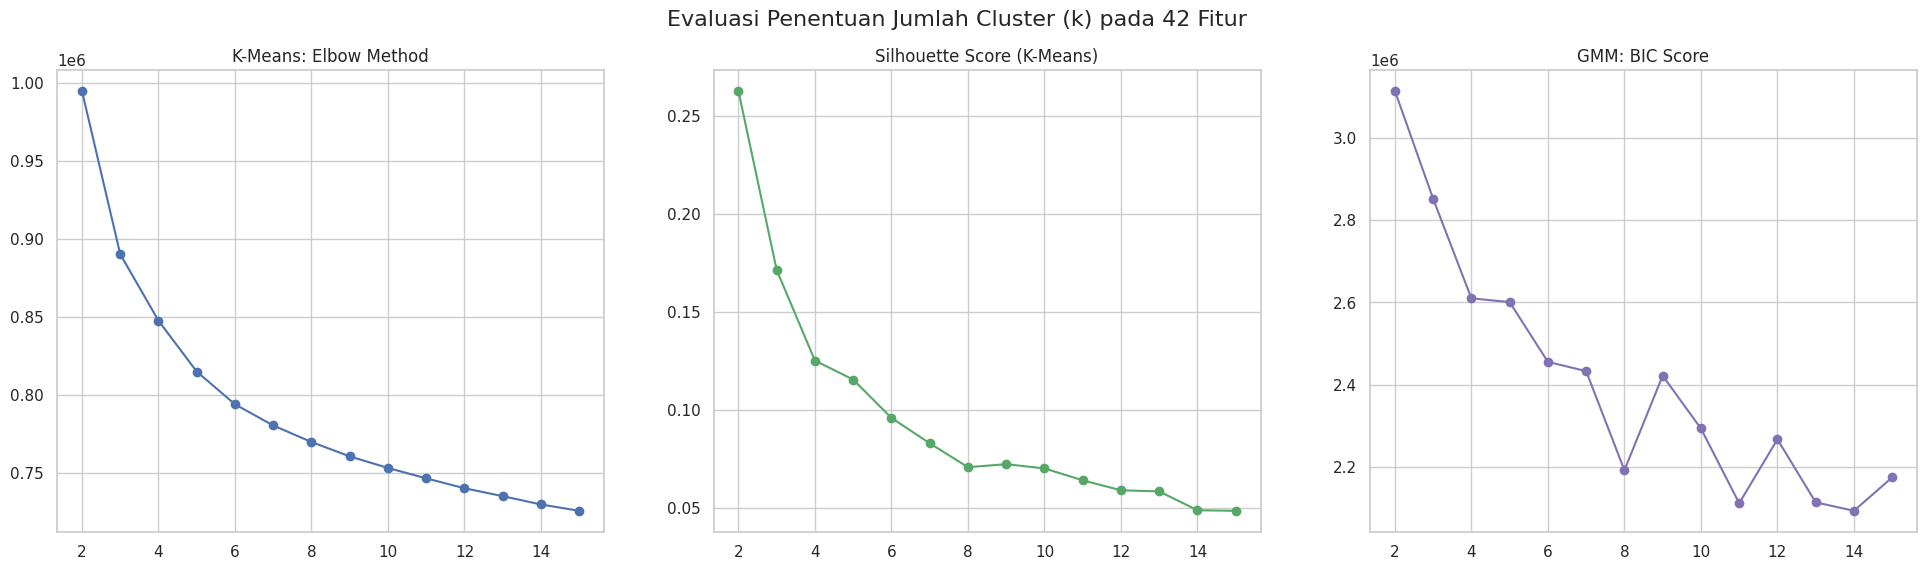

In [ ]:
print("\nMemulai pencarian jumlah cluster (k) yang optimal...")
k_range = range(2, 16)
inertia_scores = []
silhouette_scores_kmeans = []
bic_scores_gmm = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled)
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores_kmeans.append(silhouette_score(X_scaled, kmeans.labels_))
    gmm = GaussianMixture(n_components=k, random_state=42).fit(X_scaled)
    bic_scores_gmm.append(gmm.bic(X_scaled))

# Plotting hasil pencarian k
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
axes[0].plot(k_range, inertia_scores, 'bo-'); axes[0].set_title('K-Means: Elbow Method')
axes[1].plot(k_range, silhouette_scores_kmeans, 'go-'); axes[1].set_title('Silhouette Score (K-Means)')
axes[2].plot(k_range, bic_scores_gmm, 'mo-'); axes[2].set_title('GMM: BIC Score')
plt.suptitle('Evaluasi Penentuan Jumlah Cluster (k) pada 42 Fitur', fontsize=16)
plt.show()

In [ ]:
OPTIMAL_K = 4

# Melatih model final K-Means
kmeans_final = KMeans(n_clusters=OPTIMAL_K, random_state=42, n_init=10)
kmeans_labels = kmeans_final.fit_predict(X_scaled)
print("Model K-Means final berhasil dilatih.")

Model K-Means final berhasil dilatih.


In [ ]:
# Melatih model final GMM
gmm_final = GaussianMixture(n_components=OPTIMAL_K, random_state=42)
gmm_labels = gmm_final.fit_predict(X_scaled)
print("Model GMM final berhasil dilatih.")

Model GMM final berhasil dilatih.


In [ ]:
# Memberikan label cluster ke dataset

df_labeled = df_processed.copy()
df_labeled['kmeans_cluster'] = kmeans_labels
df_labeled['gmm_cluster'] = gmm_labels

print("\nLabel cluster dari K-Means dan GMM telah ditambahkan ke dataset.")
print("Contoh data dengan label cluster:")
display(df_labeled[['Q1A', 'kmeans_cluster', 'gmm_cluster']].head())


Label cluster dari K-Means dan GMM telah ditambahkan ke dataset.
Contoh data dengan label cluster:


Q1A  kmeans_cluster  gmm_cluster
0  1.340379               0            0
1  1.340379               2            1
2  0.367101               2            3
3 -0.606177               3            1
4 -0.606177               0            3

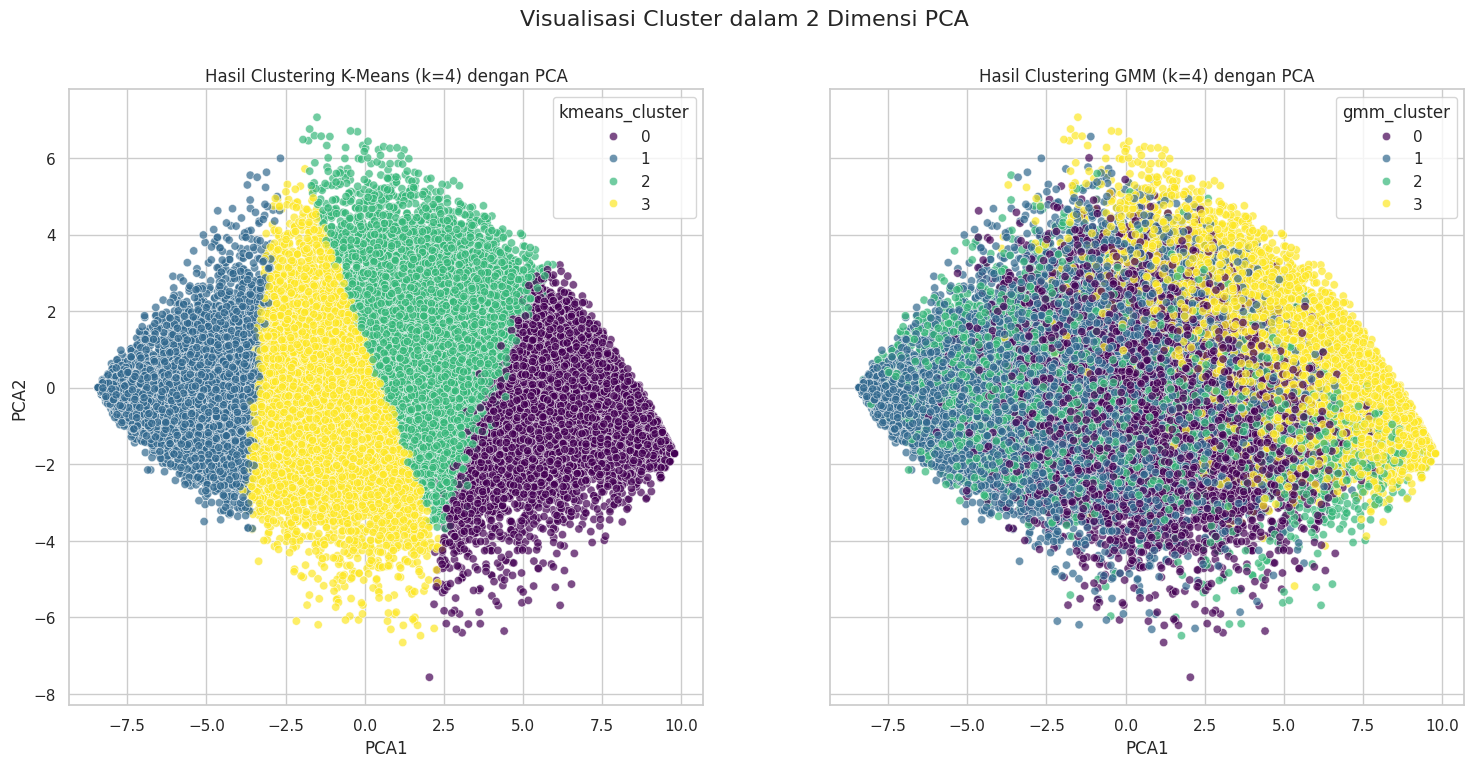

In [ ]:
# Kurangi dimensi dari 42 fitur stres menjadi 2 komponen utama untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['kmeans_cluster'] = kmeans_labels
df_pca['gmm_cluster'] = gmm_labels

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Plot K-Means
sns.scatterplot(x='PCA1', y='PCA2', hue='kmeans_cluster', data=df_pca, palette='viridis', ax=axes[0], alpha=0.7)
axes[0].set_title(f'Hasil Clustering K-Means (k={OPTIMAL_K}) dengan PCA')

# Plot GMM
sns.scatterplot(x='PCA1', y='PCA2', hue='gmm_cluster', data=df_pca, palette='viridis', ax=axes[1], alpha=0.7)
axes[1].set_title(f'Hasil Clustering GMM (k={OPTIMAL_K}) dengan PCA')

plt.suptitle('Visualisasi Cluster dalam 2 Dimensi PCA', fontsize=16)
plt.show()

In [ ]:
# Simpan ke csv untuk mempermudah proses selanjutnya
df_labeled.to_csv('data_labeled.csv', index=False)

# Visualisasi Hasil

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur style dan ukuran plot
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

In [ ]:
df_labeled = pd.read_csv('data_labeled.csv')

In [ ]:
# Mendefinisikan item per skala DASS (Diambil berdasarkan referensi)
depression_cols = [f'Q{i}A' for i in [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42]]
anxiety_cols = [f'Q{i}A' for i in [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41]]
stress_cols = [f'Q{i}A' for i in [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]]

# Menghitung skor rata-rata per skala untuk setiap cluster
cluster_profiles_agg = pd.DataFrame({
    'Depression': df_labeled.groupby('kmeans_cluster')[depression_cols].mean().mean(axis=1),
    'Anxiety': df_labeled.groupby('kmeans_cluster')[anxiety_cols].mean().mean(axis=1),
    'Stress': df_labeled.groupby('kmeans_cluster')[stress_cols].mean().mean(axis=1)
})

print("\nProfil Rata-rata per Skala untuk Setiap Cluster:")
display(cluster_profiles_agg)


Profil Rata-rata per Skala untuk Setiap Cluster:


Depression   Anxiety    Stress
kmeans_cluster                                
0                 0.905494  1.006769  0.938768
1                -0.933774 -0.726140 -0.873176
2                 0.570670  0.104916  0.283642
3                -0.318471 -0.154444 -0.140258

K-Means

<ipython-input-24-b8fa697082d0>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = row.tolist() + [row[0]]


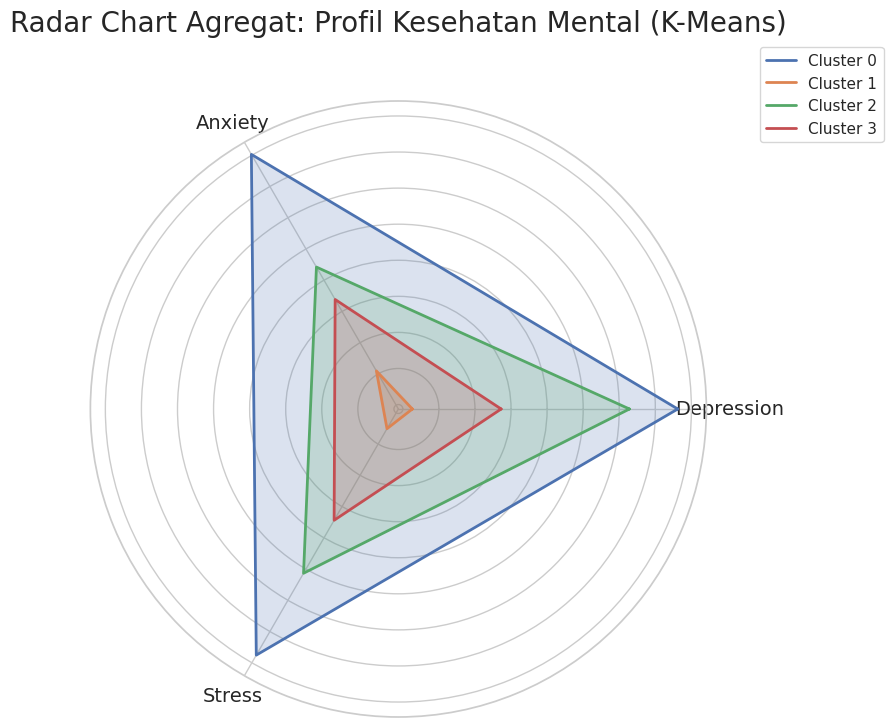

In [ ]:
labels = cluster_profiles_agg.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() + [0]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i, row in cluster_profiles_agg.iterrows():
    values = row.tolist() + [row[0]]
    ax.plot(angles, values, label=f'Cluster {i}', linewidth=2)
    ax.fill(angles, values, alpha=0.2)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, size=14)
plt.title('Radar Chart Agregat: Profil Kesehatan Mental (K-Means)', size=20, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

In [ ]:
df_finish = df_final.copy()
df_finish['kmeans_cluster'] = kmeans_labels
df_finish['gmm_cluster'] = gmm_labels

--- Analisis Profil Demografi & Kepribadian (SIAPA orangnya?) ---

Profil Rata-rata Fitur Numerik (Usia & TIPI) per Cluster:


education     urban    gender        age      hand  religion  \
kmeans_cluster                                                                 
0                2.325564  2.245739  1.870648  21.482739  1.149599  7.822141   
1                2.719621  2.203607  1.731761  26.013759  1.118858  7.924500   
2                2.451356  2.239184  1.796794  23.163192  1.124187  7.440148   
3                2.532078  2.211590  1.796787  23.112151  1.122007  7.749975   

                orientation       race     voted   married  ...     TIPI1  \
kmeans_cluster                                              ...             
0                  1.842972  29.997087  1.794173  1.087400  ...  3.405972   
1                  1.517401  28.989479  1.634062  1.235519  ...  4.337033   
2                  1.638198  31.505268  1.727752  1.121946  ...  3.419637   
3                  1.587070  29.639302  1.713413  1.150094  ...  3.925002   

                   TIPI2     TIPI3     TIPI4     TIPI5     TIPI6     TIPI7  \
kmeans_cluster                                                               
0               4.641078  4.329060  6.321340  4.338966  5.262054  5.228259   
1               3.660076  5.235056  3.724477  5.447682  4.334143  5.354954   
2               4.334566  4.452141  5.675970  4.691325  5.127774  5.227976   
3               4.173352  4.805164  5.224598  5.031536  4.770474  5.310141   

                   TIPI8     TIPI9    TIPI10  
kmeans_cluster                                
0               4.885069  2.513328  4.065841  
1               3.651174  4.968551  3.492196  
2               4.554136  3.083838  3.927595  
3               4.214743  3.798167  3.756381  

[4 rows x 21 columns]

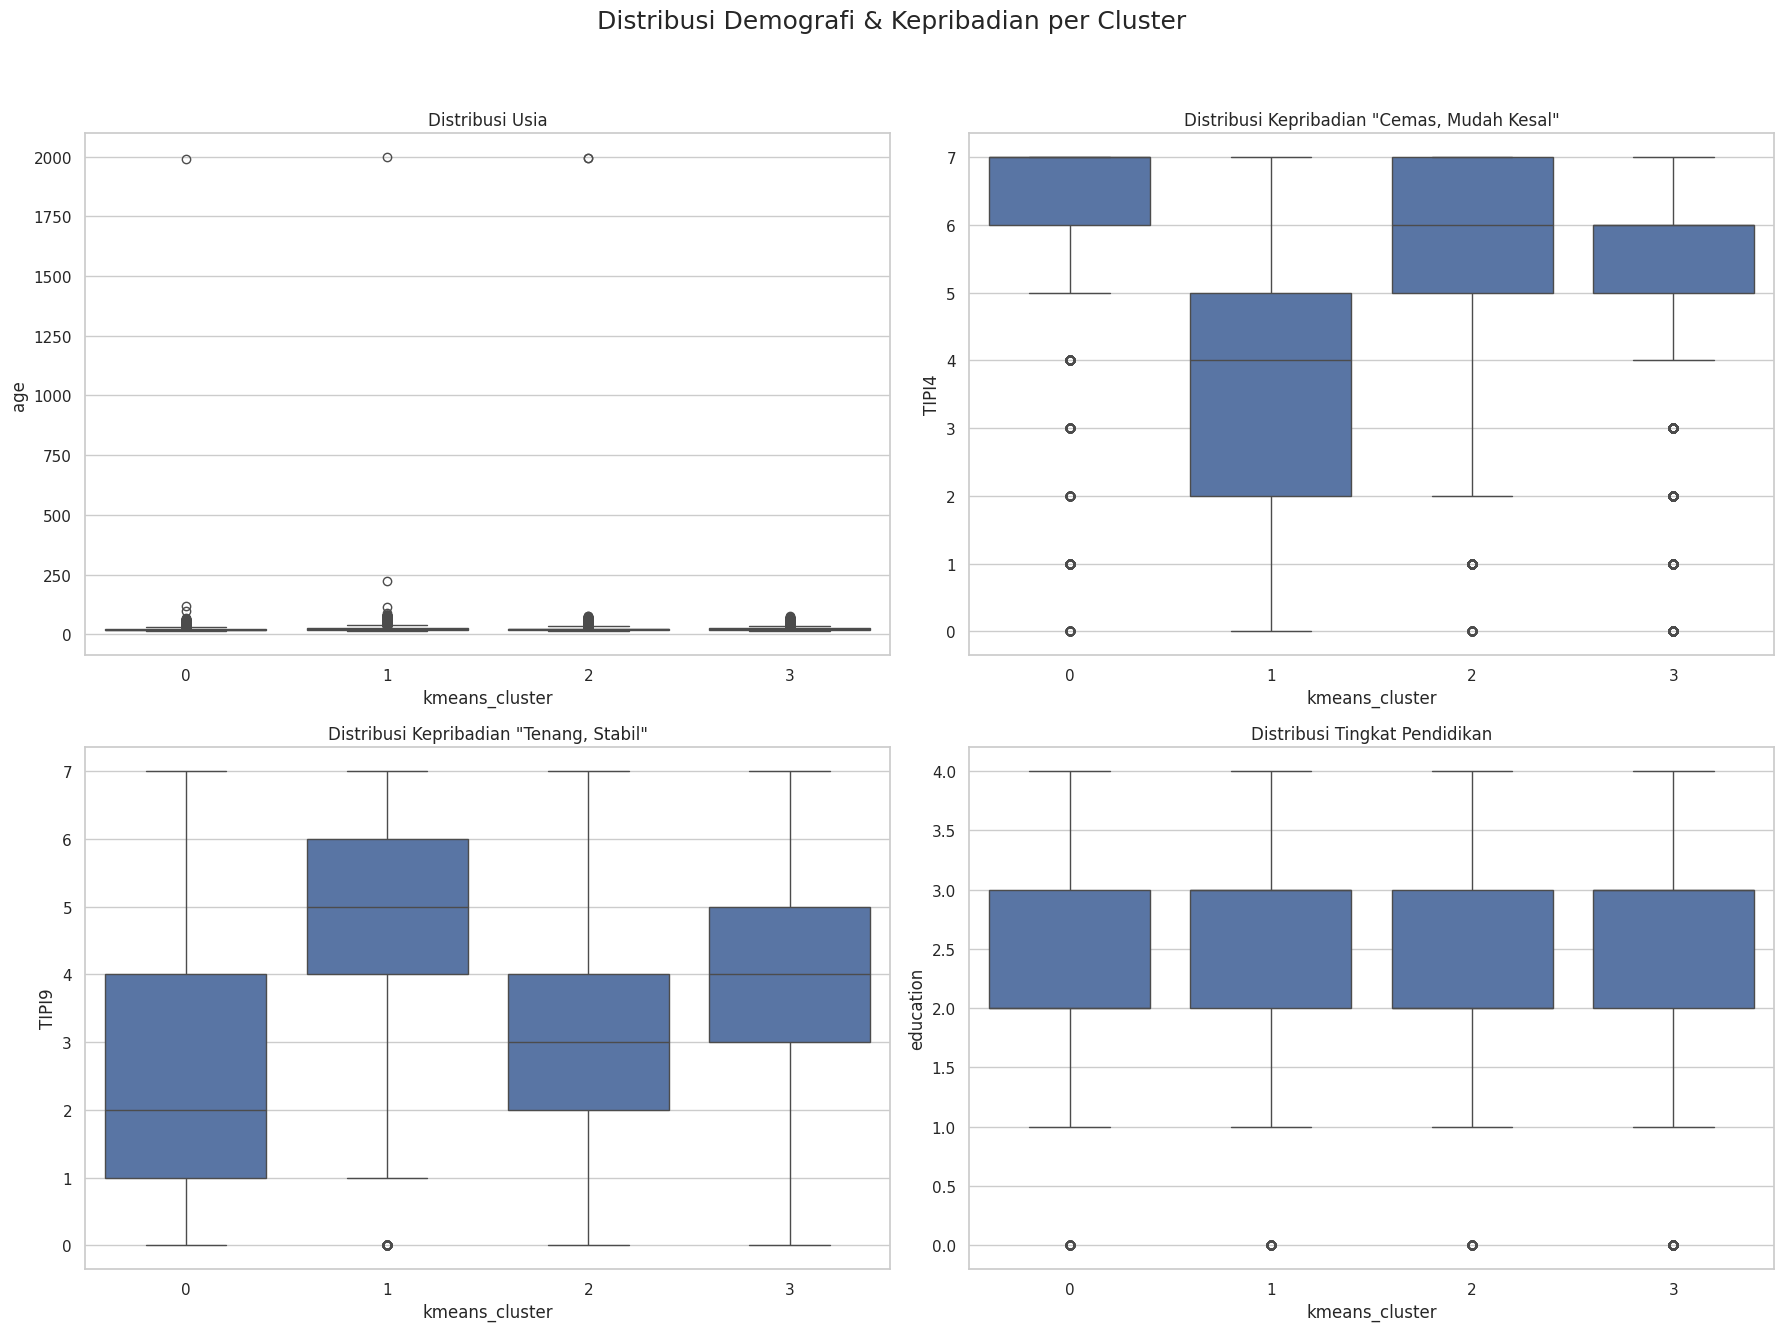

In [ ]:
print("--- Analisis Profil Demografi & Kepribadian (SIAPA orangnya?) ---")

# Analisis Fitur Numerik (Usia & Skor TIPI)
print("\nProfil Rata-rata Fitur Numerik (Usia & TIPI) per Cluster:")
numerical_profiles = df_finish.groupby('kmeans_cluster')[profiling_cols].mean()
display(numerical_profiles)

# Visualisasi distribusi Usia dan beberapa skor TIPI dengan Box Plot
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Distribusi Demografi & Kepribadian per Cluster', fontsize=18)

# Contoh 1: Usia
sns.boxplot(x='kmeans_cluster', y='age', data=df_finish, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Usia')

# Contoh 2: TIPI4 (Anxious, easily upset - Cemas, mudah kesal)
sns.boxplot(x='kmeans_cluster', y='TIPI4', data=df_finish, ax=axes[0, 1])
axes[0, 1].set_title('Distribusi Kepribadian "Cemas, Mudah Kesal"')

# Contoh 3: TIPI9 (Calm, emotionally stable - Tenang, stabil secara emosi)
sns.boxplot(x='kmeans_cluster', y='TIPI9', data=df_finish, ax=axes[1, 0])
axes[1, 0].set_title('Distribusi Kepribadian "Tenang, Stabil"')

# Contoh 4: education (1=Less HS, 2=HS, 3=Univ, 4=Graduate)
sns.boxplot(x='kmeans_cluster', y='education', data=df_finish, ax=axes[1, 1])
axes[1, 1].set_title('Distribusi Tingkat Pendidikan')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

 Distribusi Persentase Fitur Kategorikal per Cluster:

Distribusi untuk 'education':


education           0       1       2       3       4
kmeans_cluster                                       
0               1.27%  14.70%  42.94%  32.40%   8.70%
1               1.25%   5.49%  31.39%  43.79%  18.08%
2               1.12%  10.82%  40.56%  36.81%  10.69%
3               1.30%   9.26%  36.81%  40.18%  12.45%

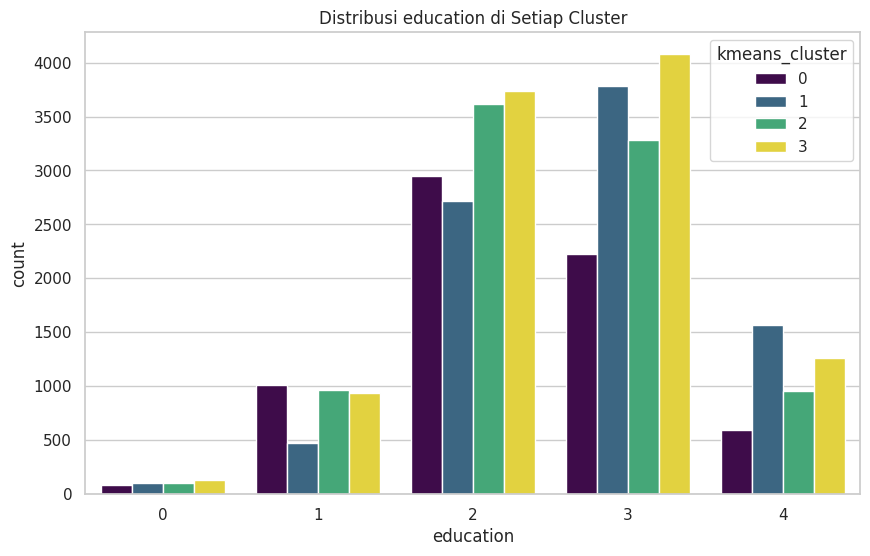


Distribusi untuk 'urban':


urban               0       1       2       3
kmeans_cluster                               
0               1.34%  21.30%  28.81%  48.55%
1               0.82%  21.85%  33.47%  43.85%
2               0.91%  20.14%  33.08%  45.88%
3               0.99%  20.73%  34.43%  43.86%

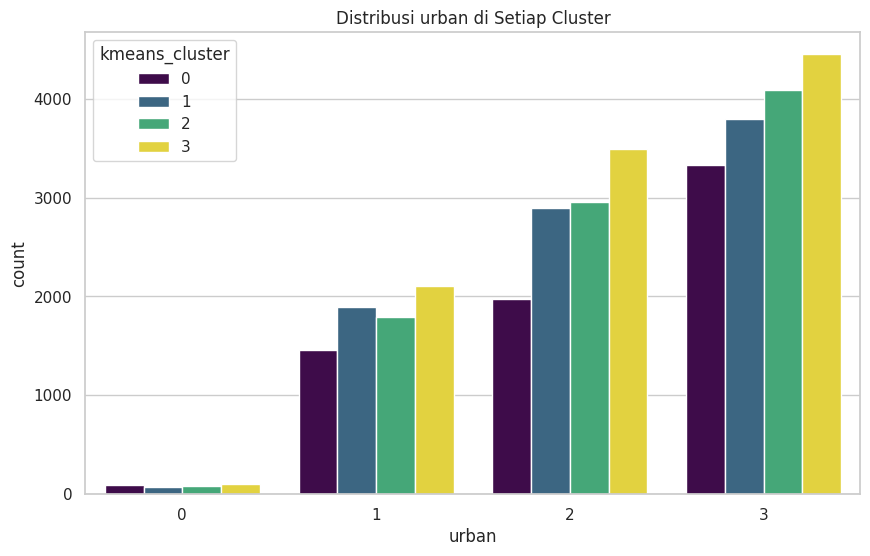


Distribusi untuk 'gender':


gender              0       1       2      3
kmeans_cluster                              
0               0.20%  14.71%  82.90%  2.18%
1               0.15%  27.00%  72.38%  0.47%
2               0.22%  21.48%  76.70%  1.60%
3               0.15%  21.08%  77.72%  1.05%

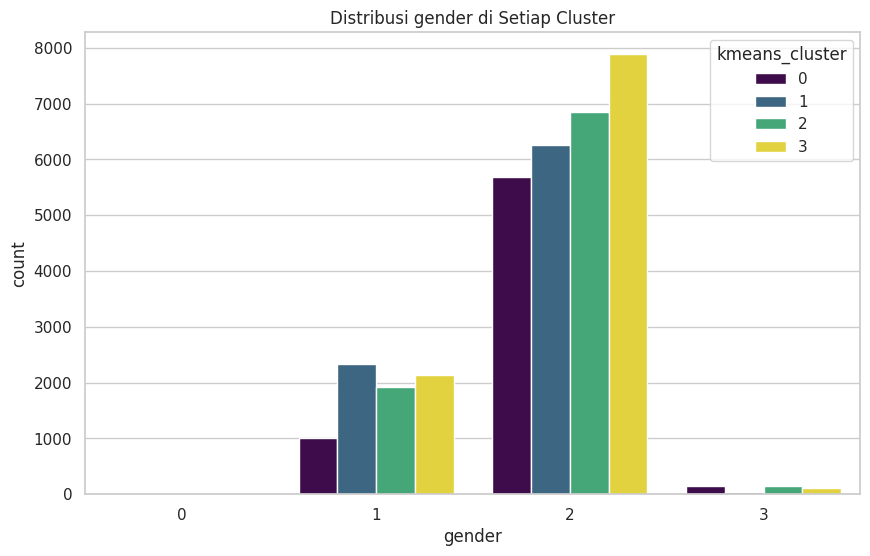


Distribusi untuk 'age':


age              13     14     15     16     17     18     19      20    \
kmeans_cluster                                                            
0               2.35%  4.31%  5.58%  7.66%  7.37%  8.96%  8.80%  10.17%   
1               0.47%  0.84%  1.92%  3.01%  3.76%  6.45%  8.07%   8.89%   
2               1.27%  2.39%  3.89%  5.68%  5.95%  7.76%  9.07%  10.46%   
3               0.98%  1.65%  2.91%  5.00%  5.78%  7.51%  9.76%   9.99%   

age              21     22    ...   82     89     99     115    117    223   \
kmeans_cluster                ...                                             
0               8.64%  7.12%  ...  0.00%  0.00%  0.01%  0.00%  0.01%  0.00%   
1               8.96%  7.54%  ...  0.01%  0.01%  0.00%  0.01%  0.00%  0.01%   
2               8.87%  7.92%  ...  0.00%  0.00%  0.00%  0.00%  0.00%  0.00%   
3               9.85%  8.43%  ...  0.00%  0.00%  0.00%  0.00%  0.00%  0.00%   

age              1991   1993   1996   1998  
kmeans_cluster                              
0               0.01%  0.00%  0.00%  0.00%  
1               0.00%  0.00%  0.00%  0.01%  
2               0.00%  0.01%  0.01%  0.00%  
3               0.00%  0.00%  0.00%  0.00%  

[4 rows x 78 columns]

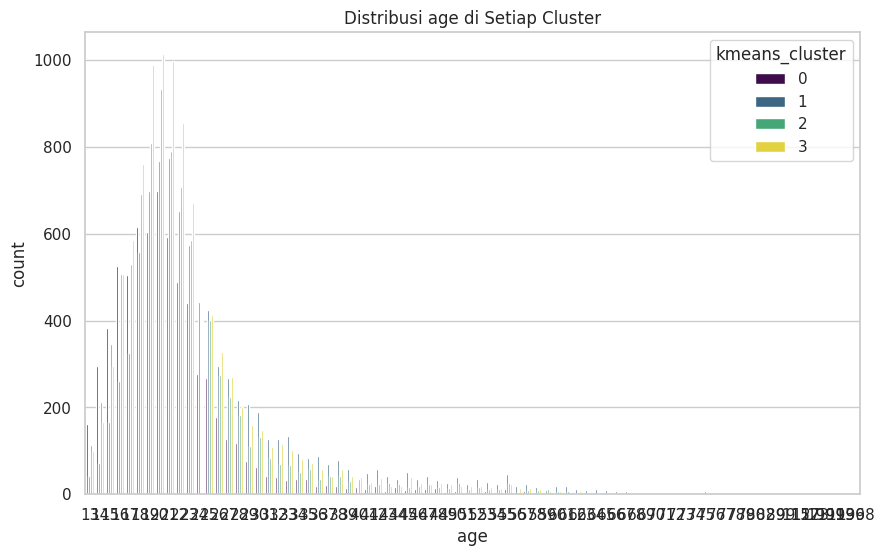


Distribusi untuk 'hand':


hand                0       1       2      3
kmeans_cluster                              
0               0.47%  86.25%  11.14%  2.14%
1               0.52%  88.08%  10.39%  1.01%
2               0.43%  88.05%  10.20%  1.32%
3               0.34%  88.25%  10.26%  1.14%

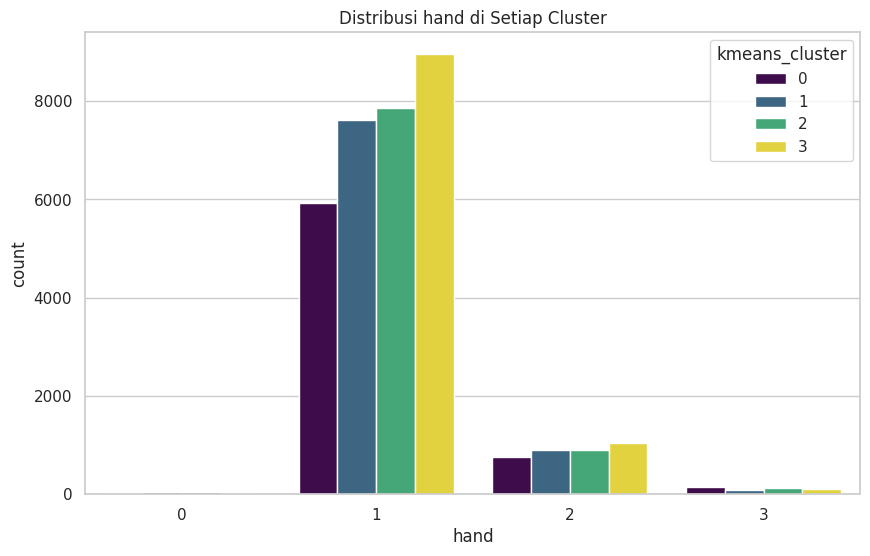


Distribusi untuk 'religion':


religion           0      1       2      3      4      5      6      7   \
kmeans_cluster                                                            
0               1.05%  6.39%   9.18%  0.98%  8.19%  0.41%  2.55%  5.29%   
1               0.60%  5.95%   7.72%  1.63%  6.94%  0.18%  4.67%  5.24%   
2               0.99%  8.81%  10.73%  1.17%  7.66%  0.26%  3.49%  5.49%   
3               0.95%  7.69%   8.00%  1.35%  7.64%  0.22%  3.63%  5.29%   

religion           8      9       10     11     12  
kmeans_cluster                                      
0               1.51%  0.20%  58.67%  0.20%  5.38%  
1               2.24%  0.32%  60.92%  0.14%  3.43%  
2               1.76%  0.37%  54.91%  0.10%  4.28%  
3               1.55%  0.34%  59.36%  0.14%  3.85%

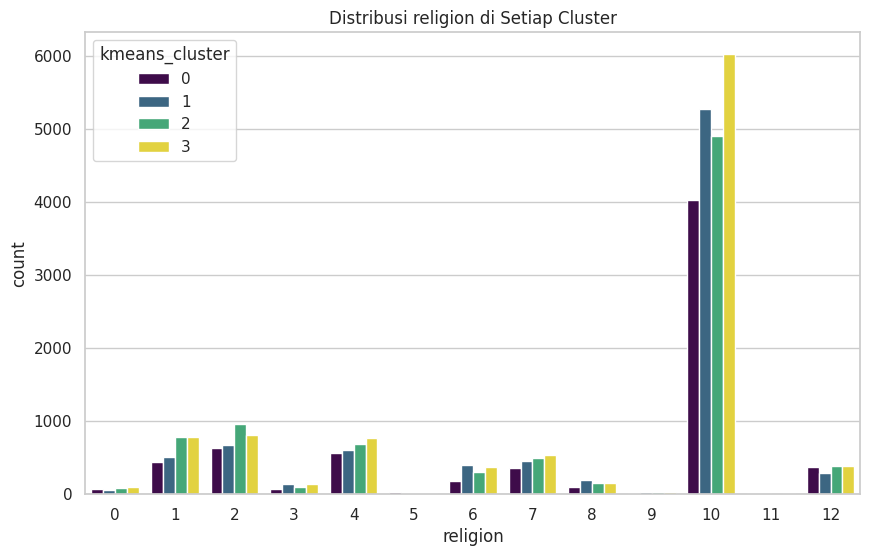


Distribusi untuk 'orientation':


orientation         0       1       2      3      4       5
kmeans_cluster                                             
0               8.57%  51.83%  16.39%  5.16%  6.09%  11.97%
1               8.00%  68.37%   7.40%  3.94%  4.71%   7.58%
2               8.13%  59.77%  13.61%  5.40%  4.83%   8.26%
3               8.60%  62.76%  11.26%  4.43%  4.58%   8.36%

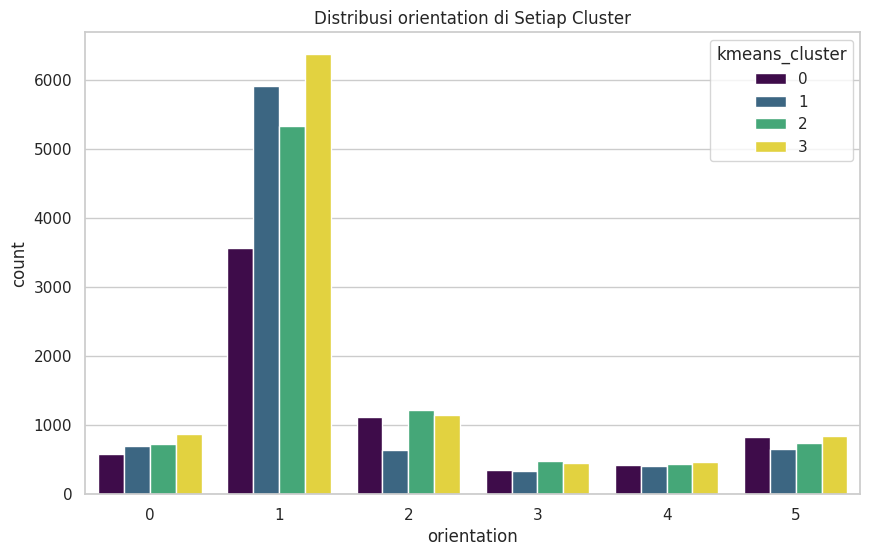


Distribusi untuk 'race':


race                10     20     30     40     50      60      70
kmeans_cluster                                                    
0               60.74%  1.08%  1.37%  0.07%  0.68%  23.12%  12.94%
1               63.02%  0.65%  1.51%  0.03%  0.22%  22.12%  12.44%
2               57.66%  0.95%  1.46%  0.03%  0.58%  27.16%  12.16%
3               61.68%  0.69%  1.16%  0.02%  0.49%  24.36%  11.59%

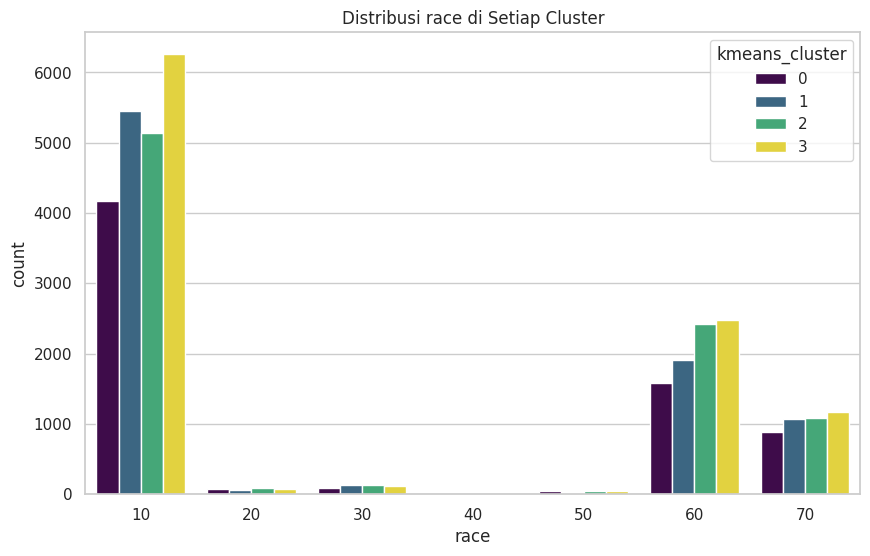


Distribusi untuk 'voted':


voted               0       1       2
kmeans_cluster                       
0               0.93%  18.72%  80.35%
1               0.77%  35.04%  64.18%
2               0.80%  25.63%  73.57%
3               0.88%  26.90%  72.22%

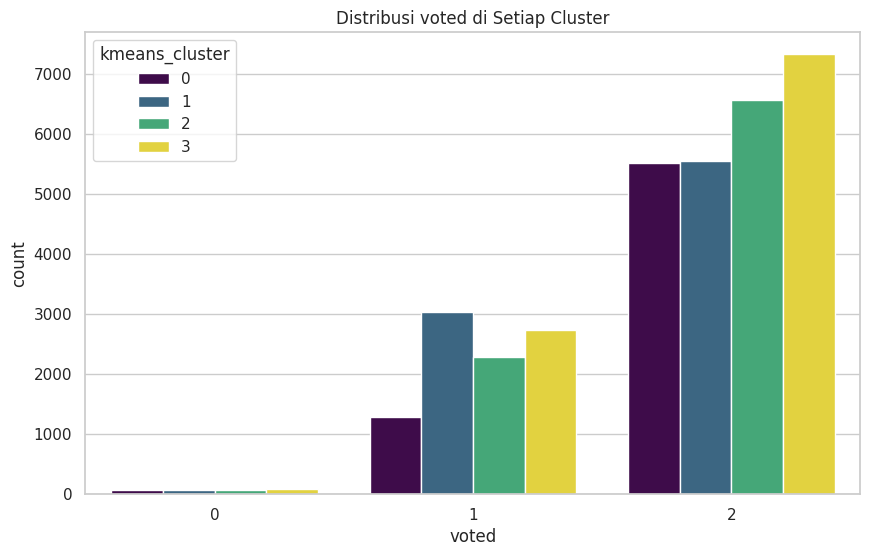


Distribusi untuk 'married':


married             0       1       2      3
kmeans_cluster                              
0               0.64%  91.86%   5.62%  1.88%
1               0.42%  78.78%  17.63%  3.17%
2               0.58%  89.05%   7.96%  2.41%
3               0.49%  86.39%  10.73%  2.38%

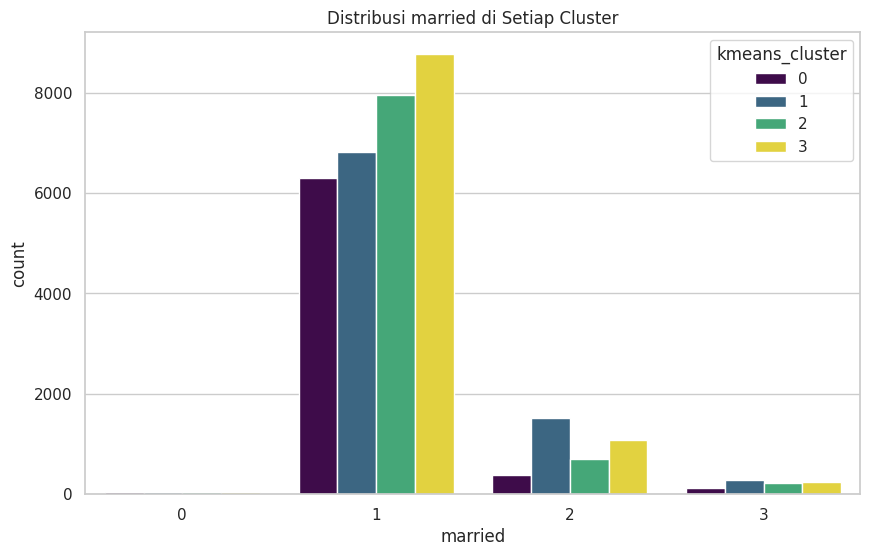


Distribusi untuk 'familysize':


familysize        0      1       2       3       4       5      6      7    \
kmeans_cluster                                                               
0               3.25%  7.11%  20.99%  22.97%  19.50%  12.96%  6.47%  3.18%   
1               2.54%  6.22%  20.52%  22.51%  19.91%  13.32%  7.10%  3.57%   
2               2.78%  7.44%  23.78%  23.31%  19.20%  11.77%  5.73%  2.93%   
3               2.58%  7.17%  22.04%  23.18%  18.84%  12.74%  6.38%  3.23%   

familysize        8      9    ...    13     14     15     16     17     19   \
kmeans_cluster                ...                                             
0               1.85%  0.74%  ...  0.03%  0.01%  0.04%  0.01%  0.00%  0.00%   
1               2.10%  1.08%  ...  0.05%  0.00%  0.01%  0.02%  0.00%  0.00%   
2               1.59%  0.72%  ...  0.06%  0.00%  0.01%  0.01%  0.00%  0.00%   
3               1.64%  0.97%  ...  0.03%  0.05%  0.00%  0.00%  0.01%  0.01%   

familysize        21     54     99     133  
kmeans_cluster                              
0               0.00%  0.01%  0.01%  0.01%  
1               0.00%  0.00%  0.00%  0.00%  
2               0.01%  0.00%  0.00%  0.00%  
3               0.00%  0.00%  0.00%  0.00%  

[4 rows x 23 columns]

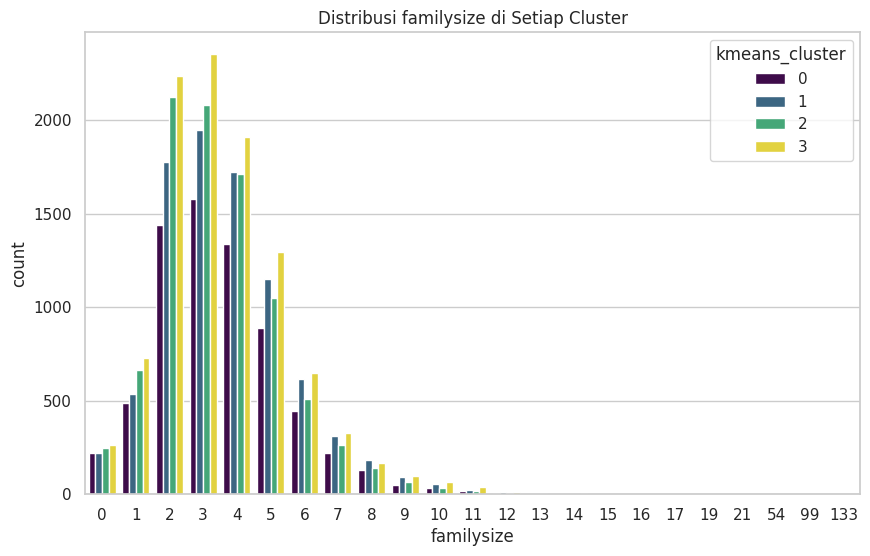


Distribusi untuk 'TIPI1':


TIPI1               0       1       2       3       4       5       6      7
kmeans_cluster                                                              
0               1.46%  23.48%  14.55%  10.60%  16.23%  16.78%  10.90%  6.00%
1               1.38%   9.19%  10.30%   9.79%  13.75%  23.36%  22.88%  9.35%
2               1.05%  19.65%  16.87%  13.08%  15.21%  19.94%  10.60%  3.60%
3               1.38%  10.75%  13.89%  12.81%  16.11%  24.26%  15.79%  5.01%

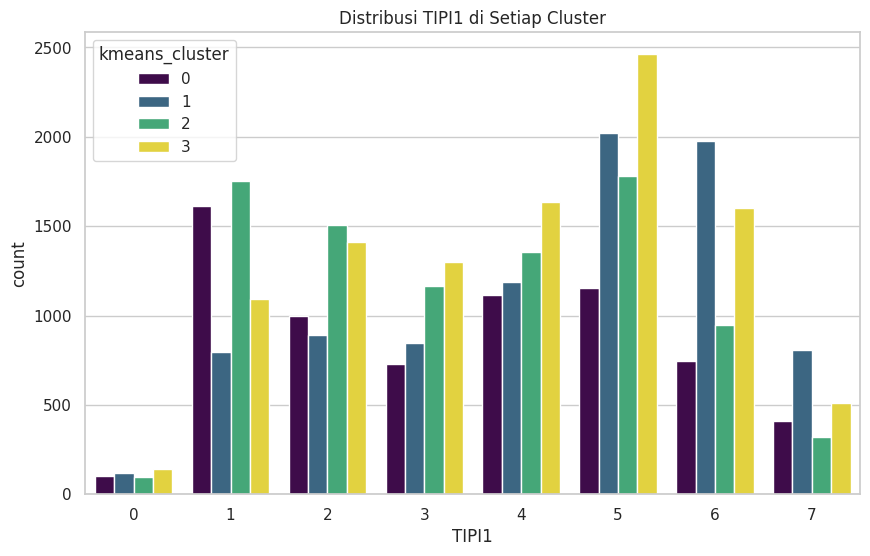


Distribusi untuk 'TIPI2':


TIPI2               0       1       2       3       4       5       6       7
kmeans_cluster                                                               
0               1.88%   6.74%   7.15%   7.79%  15.67%  23.54%  21.24%  15.98%
1               1.57%  16.36%  13.47%  12.22%  15.44%  24.88%  12.52%   3.54%
2               1.31%   7.94%   8.99%  10.84%  15.93%  27.12%  19.42%   8.45%
3               1.53%   8.55%  10.19%  11.89%  16.22%  27.85%  17.79%   5.98%

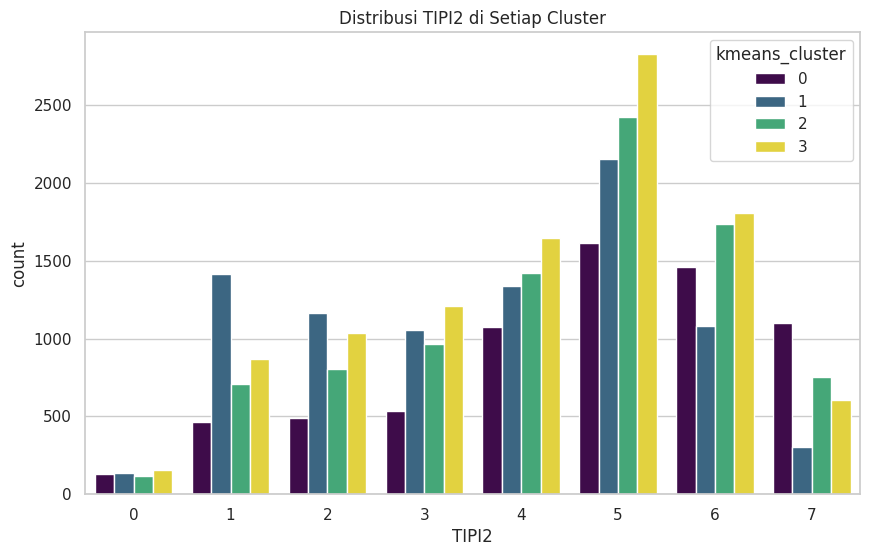


Distribusi untuk 'TIPI3':


TIPI3               0       1      2       3       4       5       6       7
kmeans_cluster                                                              
0               1.68%  10.66%  9.19%  11.57%  13.17%  20.32%  19.02%  14.39%
1               1.50%   2.34%  3.91%   7.23%   8.49%  22.50%  33.06%  20.99%
2               1.40%   7.23%  9.80%  11.53%  12.68%  23.31%  21.83%  12.22%
3               1.66%   3.44%  6.50%  10.46%  11.44%  25.69%  27.20%  13.61%

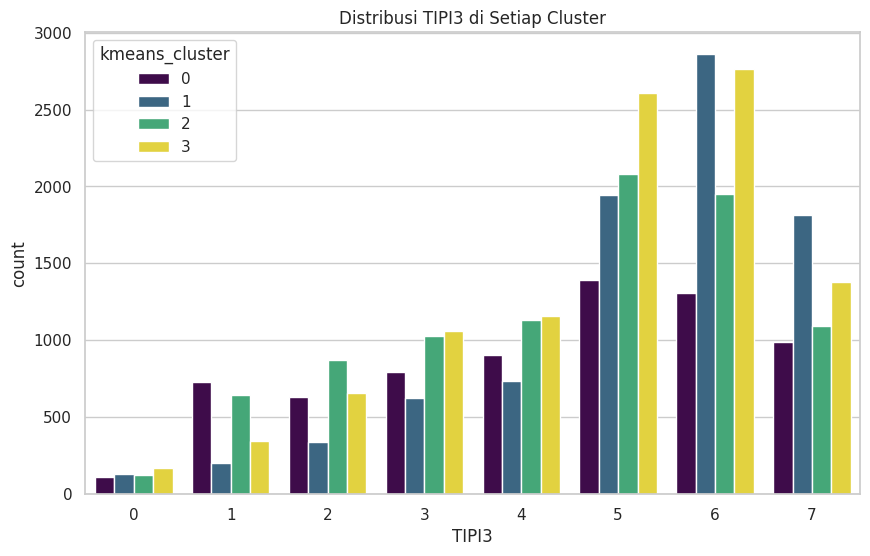


Distribusi untuk 'TIPI4':


TIPI4               0       1       2       3       4       5       6       7
kmeans_cluster                                                               
0               0.96%   1.72%   0.93%   1.30%   1.68%   7.28%  21.38%  64.75%
1               1.49%  14.07%  15.46%  12.29%  12.34%  28.82%  11.57%   3.95%
2               1.02%   1.78%   3.07%   3.74%   4.43%  19.75%  31.46%  34.75%
3               1.40%   2.03%   4.10%   6.21%   7.78%  28.19%  30.53%  19.77%

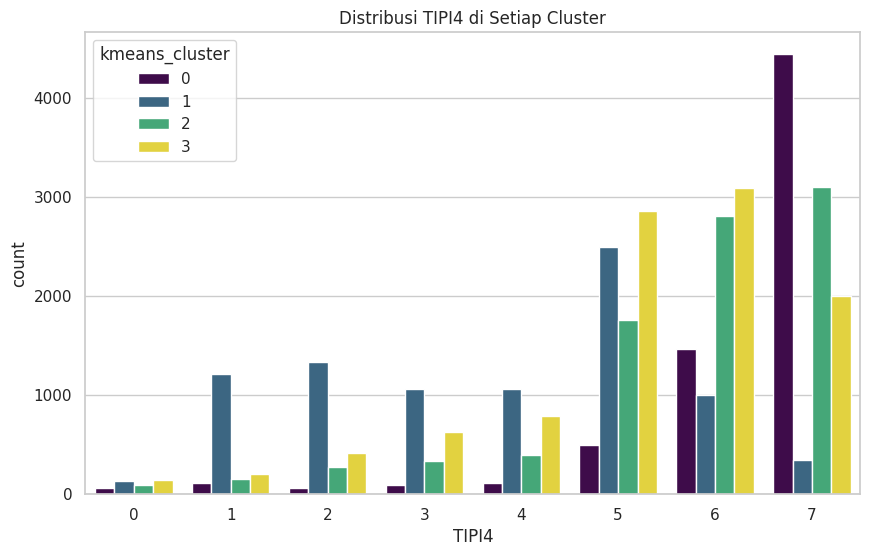


Distribusi untuk 'TIPI5':


TIPI5               0      1      2       3       4       5       6       7
kmeans_cluster                                                             
0               1.69%  9.51%  8.87%  10.68%  16.55%  21.88%  16.74%  14.09%
1               1.36%  1.55%  2.19%   4.86%   9.21%  23.44%  31.52%  25.88%
2               1.19%  4.90%  7.59%  10.10%  14.69%  24.45%  21.86%  15.23%
3               1.41%  2.10%  4.55%   8.60%  12.76%  26.64%  25.64%  18.29%

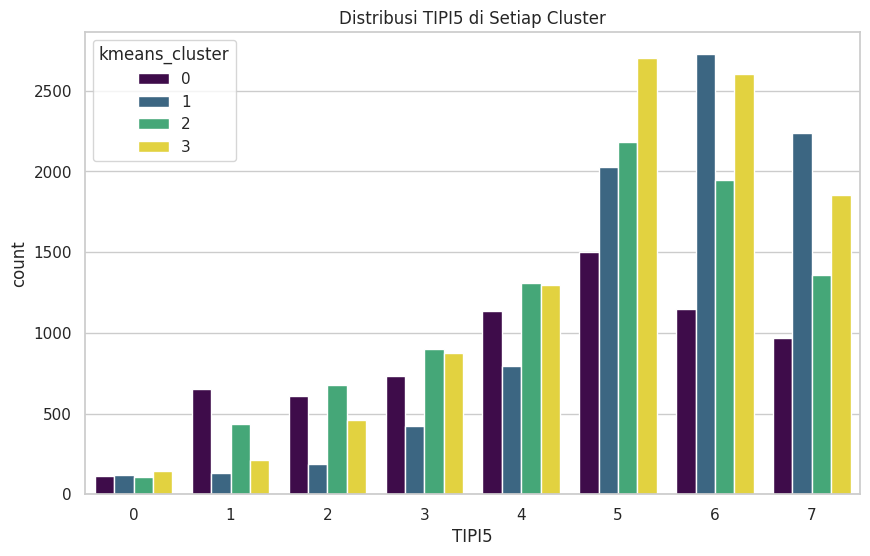


Distribusi untuk 'TIPI6':


TIPI6               0       1      2       3       4       5       6       7
kmeans_cluster                                                              
0               1.43%   4.79%  4.31%   6.96%  11.61%  15.51%  19.78%  35.60%
1               1.43%  10.65%  9.70%  10.46%  12.96%  22.52%  18.37%  13.90%
2               1.09%   4.88%  5.14%   7.72%  11.99%  17.93%  21.90%  29.34%
3               1.32%   6.01%  7.23%   9.42%  13.55%  20.73%  21.68%  20.06%

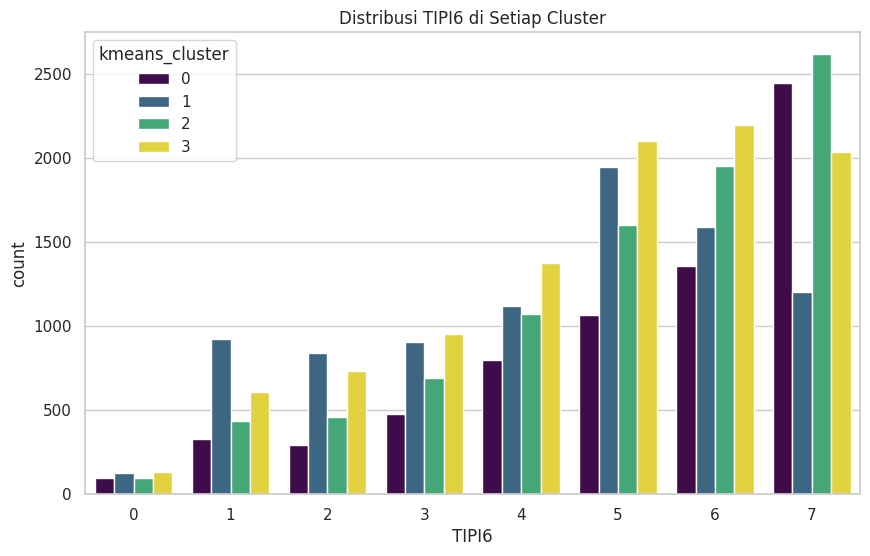


Distribusi untuk 'TIPI7':


TIPI7               0      1      2      3       4       5       6       7
kmeans_cluster                                                            
0               1.89%  3.67%  3.67%  5.16%  12.79%  20.36%  23.82%  28.64%
1               1.60%  2.13%  2.75%  4.82%   9.64%  23.77%  31.06%  24.23%
2               1.49%  2.36%  3.82%  6.28%  11.72%  22.78%  27.64%  23.91%
3               1.58%  1.51%  2.96%  5.84%  11.03%  24.34%  28.97%  23.77%

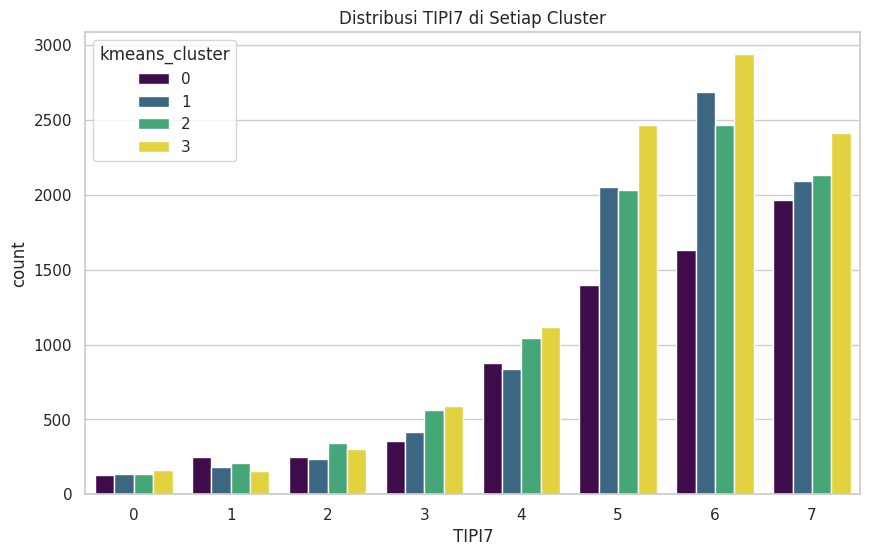


Distribusi untuk 'TIPI8':


TIPI8               0       1       2       3       4       5       6       7
kmeans_cluster                                                               
0               1.76%   7.60%   7.09%   7.79%  10.08%  19.16%  18.34%  28.17%
1               1.79%  14.86%  15.98%  13.47%  12.74%  25.33%  10.53%   5.30%
2               1.68%   8.05%   9.10%  10.39%  10.89%  22.89%  19.01%  17.99%
3               1.85%   9.21%  11.33%  12.19%  12.45%  25.39%  16.72%  10.85%

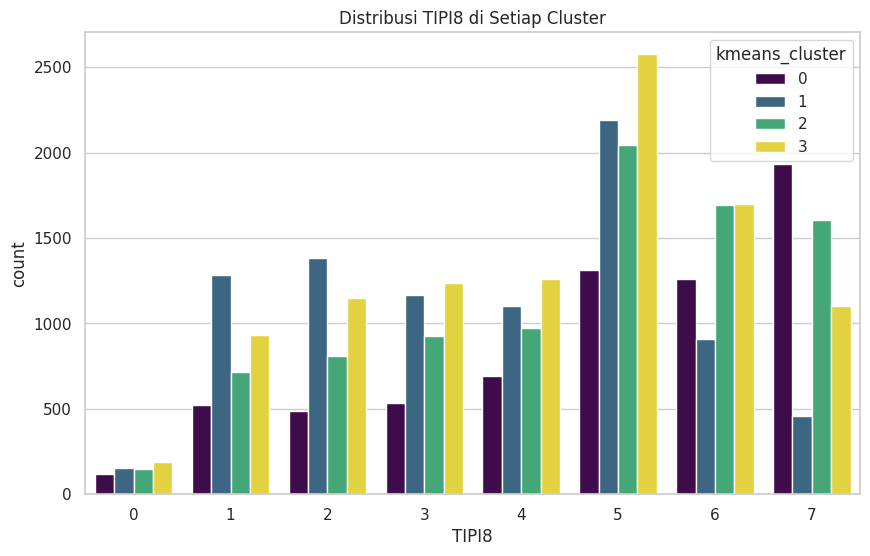


Distribusi untuk 'TIPI9':


TIPI9               0       1       2       3       4       5       6       7
kmeans_cluster                                                               
0               1.21%  34.23%  23.67%  14.74%  13.40%   7.09%   3.10%   2.55%
1               1.23%   1.51%   3.94%  10.78%  15.61%  24.22%  27.39%  15.32%
2               0.93%  17.44%  23.78%  20.21%  17.06%  11.69%   6.15%   2.73%
3               1.23%   6.02%  14.66%  21.89%  22.12%  18.42%  11.34%   4.31%

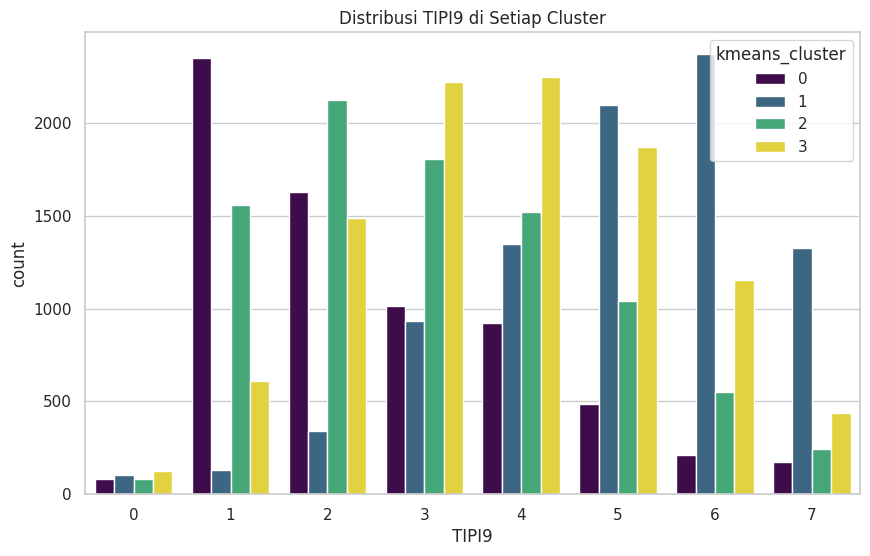


Distribusi untuk 'TIPI10':


TIPI10              0       1       2       3       4       5       6       7
kmeans_cluster                                                               
0               1.75%  12.63%  10.68%  12.56%  20.09%  15.00%  11.52%  15.78%
1               1.50%  14.35%  16.67%  17.39%  19.07%  17.60%   8.86%   4.57%
2               1.30%  10.84%  13.58%  15.04%  19.55%  17.03%  12.33%  10.33%
3               1.49%  11.47%  14.40%  16.17%  20.29%  18.49%  10.58%   7.11%

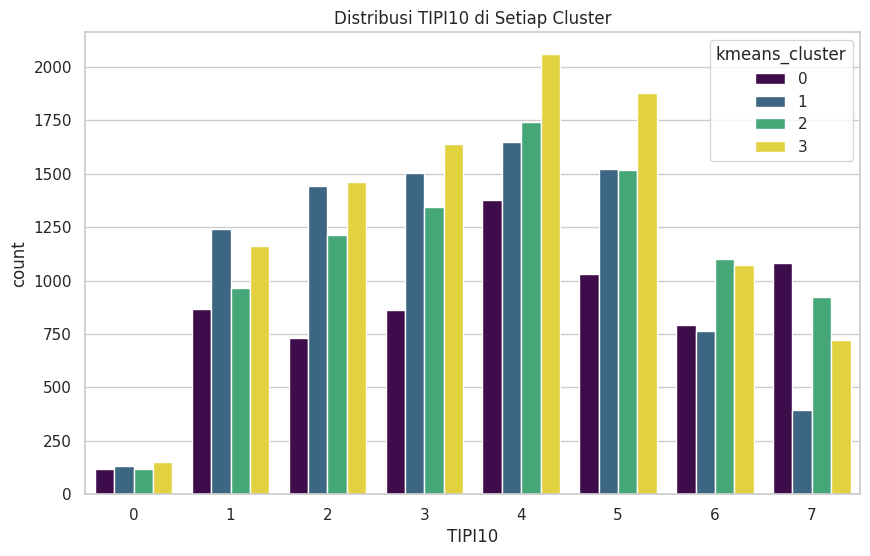

In [ ]:
print(" Distribusi Persentase Fitur Kategorikal per Cluster:")
for col in profiling_cols:
    # Menggunakan crosstab untuk melihat distribusi dalam persentase
    crosstab_norm = pd.crosstab(index=df_finish['kmeans_cluster'],
                                columns=df_finish[col],
                                normalize="index")
    print(f"\nDistribusi untuk '{col}':")
    display(crosstab_norm.map('{:.2%}'.format))

    # Visualisasi dengan Count Plot
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='kmeans_cluster', data=df_finish, palette='viridis')
    plt.title(f'Distribusi {col} di Setiap Cluster')
    plt.show()

GMM

In [ ]:
# Menghitung skor rata-rata per skala untuk setiap cluster
cluster_profiles_agg = pd.DataFrame({
    'Depression': df_labeled.groupby('gmm_cluster')[depression_cols].mean().mean(axis=1),
    'Anxiety': df_labeled.groupby('gmm_cluster')[anxiety_cols].mean().mean(axis=1),
    'Stress': df_labeled.groupby('gmm_cluster')[stress_cols].mean().mean(axis=1)
})

print("\nProfil Rata-rata per Skala untuk Setiap Cluster:")
display(cluster_profiles_agg)


Profil Rata-rata per Skala untuk Setiap Cluster:


Depression   Anxiety    Stress
gmm_cluster                                
0              0.079049  0.161885  0.155981
1             -0.518812 -0.432901 -0.416680
2             -0.194796 -0.042710 -0.153816
3              1.006659  0.618195  0.686163

<ipython-input-29-ea8f8f15d9d3>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = row.tolist() + [row[0]]


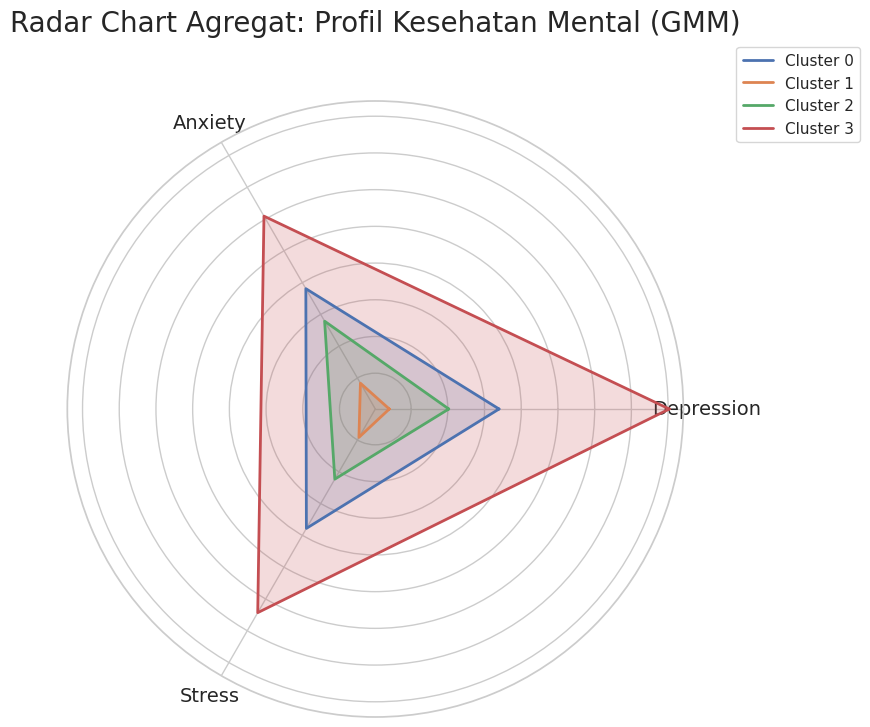

In [ ]:
labels = cluster_profiles_agg.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() + [0]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i, row in cluster_profiles_agg.iterrows():
    values = row.tolist() + [row[0]]
    ax.plot(angles, values, label=f'Cluster {i}', linewidth=2)
    ax.fill(angles, values, alpha=0.2)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, size=14)
plt.title('Radar Chart Agregat: Profil Kesehatan Mental (GMM)', size=20, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


--- Analisis Profil Cluster GMM (APA karakteristik stresnya?) ---
Profil Rata-rata (Centroid) untuk Setiap Cluster GMM:


Q1A       Q6A       Q8A      Q11A      Q12A      Q14A  \
gmm_cluster                                                               
0            0.167520  0.145736  0.165366  0.226595  0.195298  0.150568   
1           -0.457557 -0.386274 -0.445667 -0.476513 -0.430556 -0.314374   
2           -0.184178 -0.147108 -0.173373 -0.231639 -0.143829 -0.118619   
3            0.770743  0.638272  0.742978  0.767206  0.652425  0.477038   

                 Q18A      Q22A      Q27A      Q29A      Q32A      Q33A  \
gmm_cluster                                                               
0            0.120038  0.112569  0.154515  0.201842  0.144586  0.181080   
1           -0.362369 -0.434925 -0.436403 -0.454271 -0.386810 -0.446825   
2           -0.082534 -0.138728 -0.184947 -0.195343 -0.138327 -0.139018   
3            0.575493  0.763810  0.749470  0.729164  0.633635  0.696840   

                 Q35A      Q39A  
gmm_cluster                      
0            0.106494  0.111521  
1           -0.380618 -0.420359  
2           -0.121387 -0.154393  
3            0.658051  0.751153

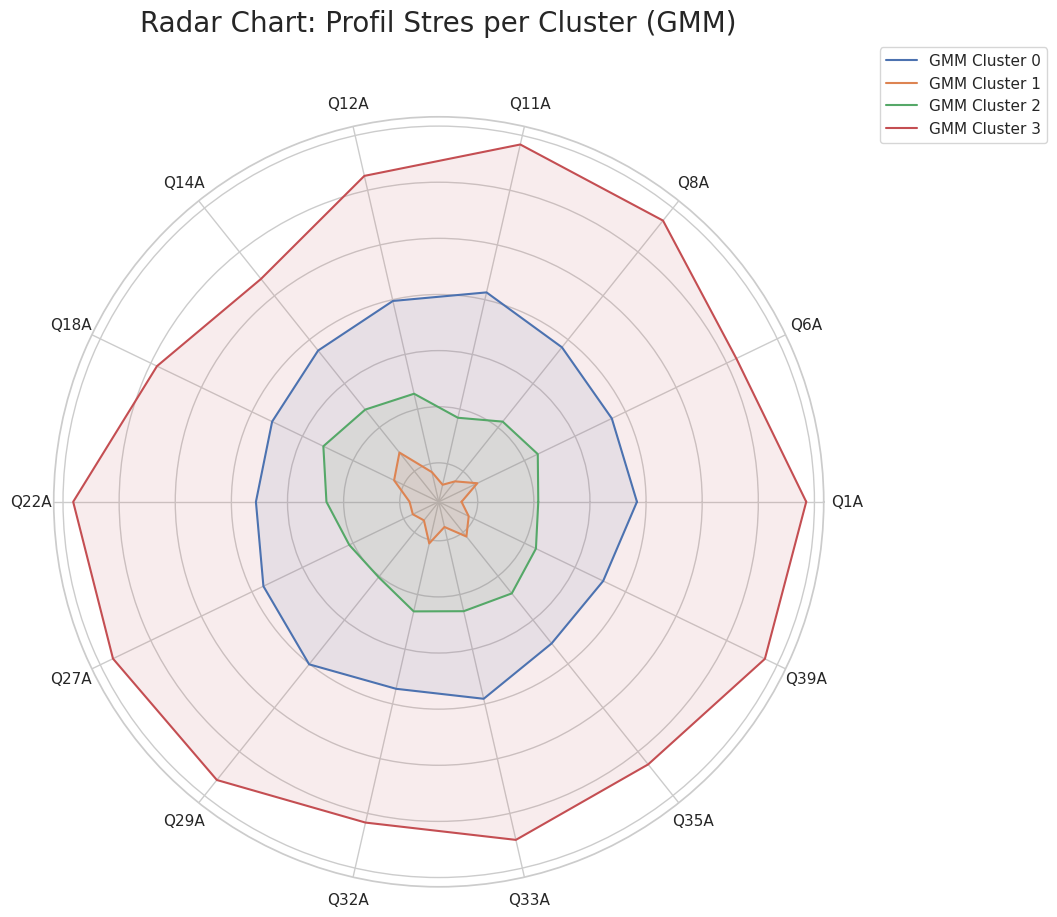

In [ ]:
print("\n--- Analisis Profil Cluster GMM (APA karakteristik stresnya?) ---")
# Menghitung nilai rata-rata (centroid) untuk setiap cluster GMM
gmm_cluster_profiles = df_labeled.groupby('gmm_cluster')[stress_cols].mean()

print("Profil Rata-rata (Centroid) untuk Setiap Cluster GMM:")
display(gmm_cluster_profiles)

# Visualisasi Profil GMM dengan Radar Chart
labels = stress_cols
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

for i, row in gmm_cluster_profiles.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'GMM Cluster {i}')
    ax.fill(angles, values, alpha=0.1)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Radar Chart: Profil Stres per Cluster (GMM)', size=20, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


--- Analisis Profil Demografi & Kepribadian GMM (SIAPA orangnya?) ---


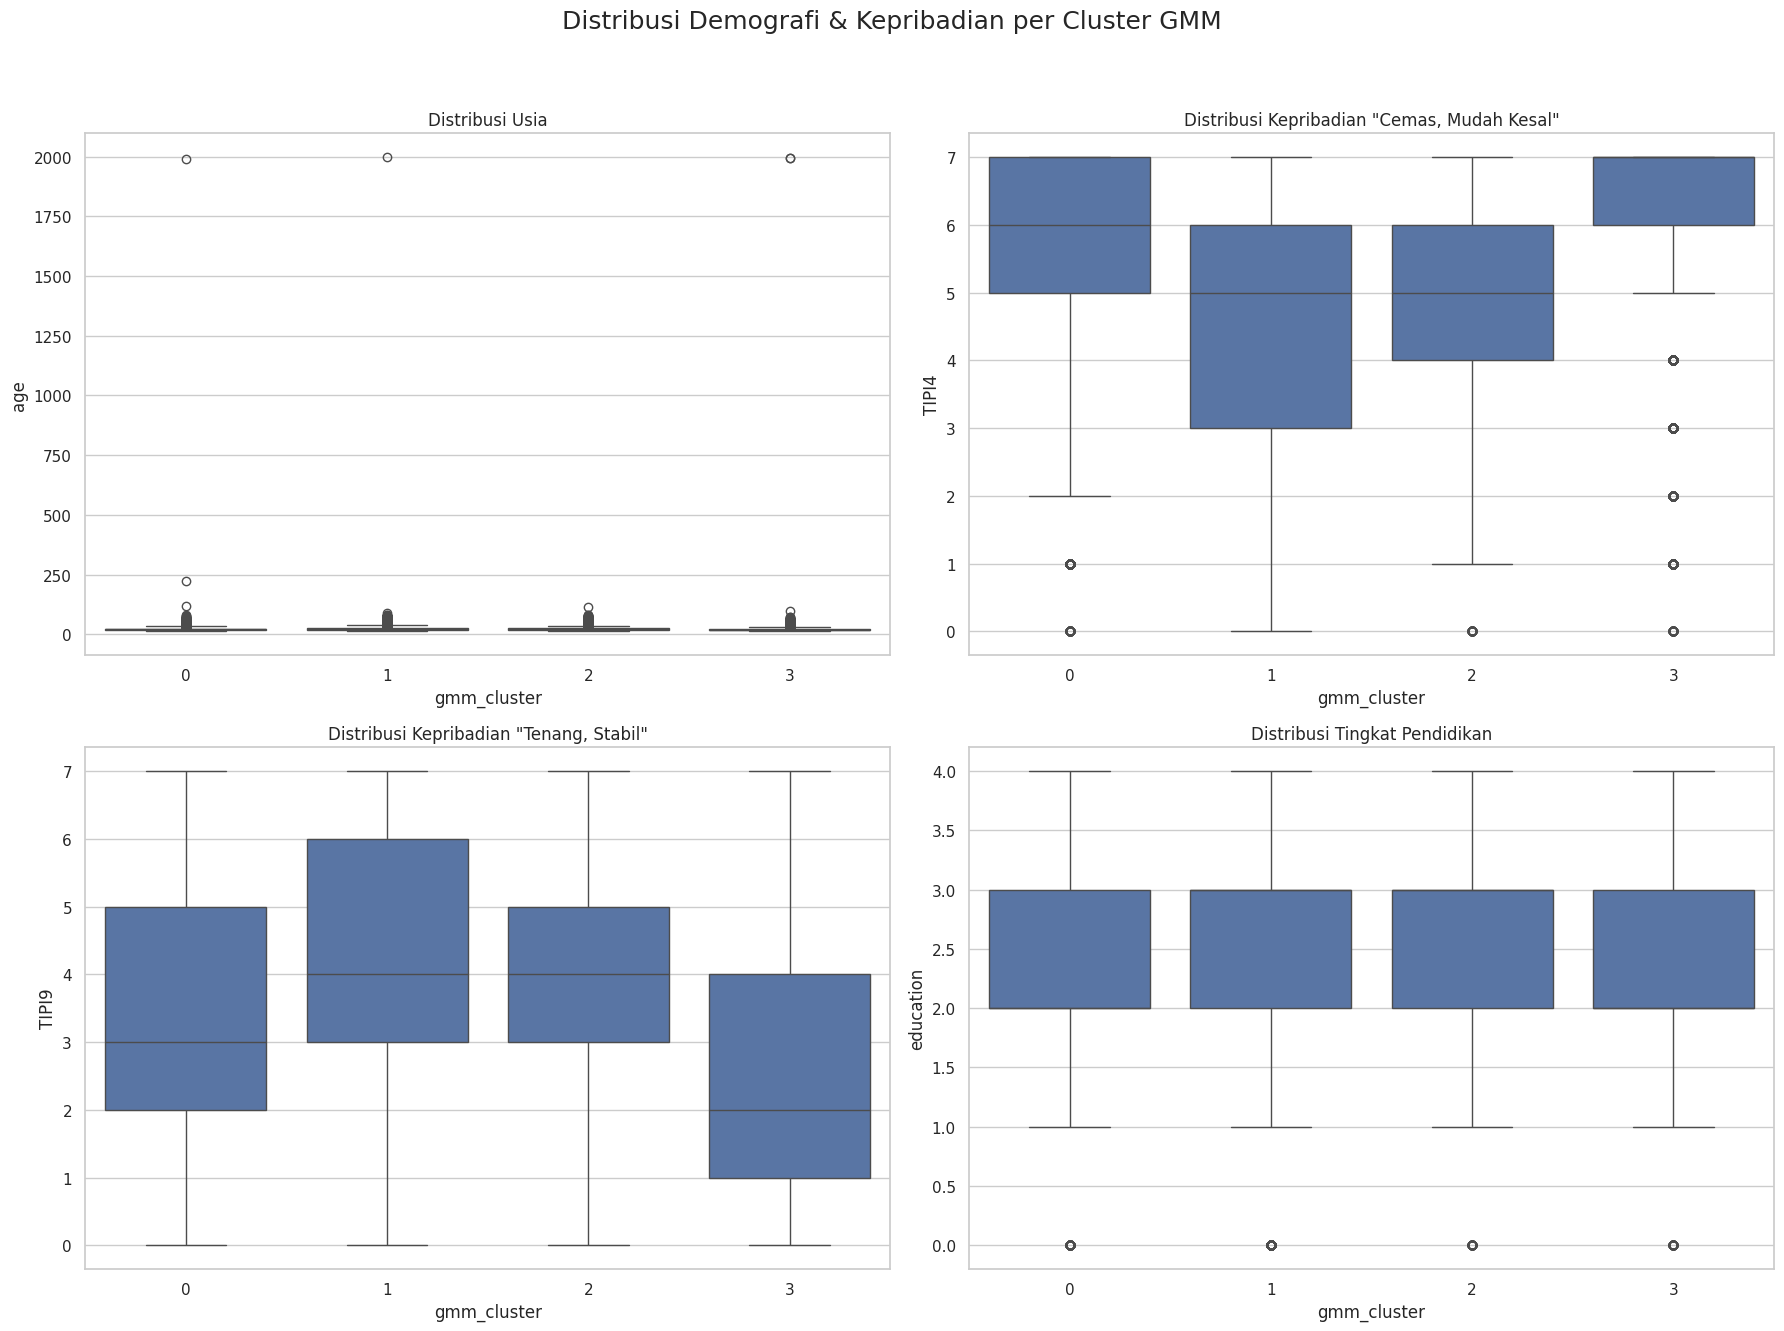

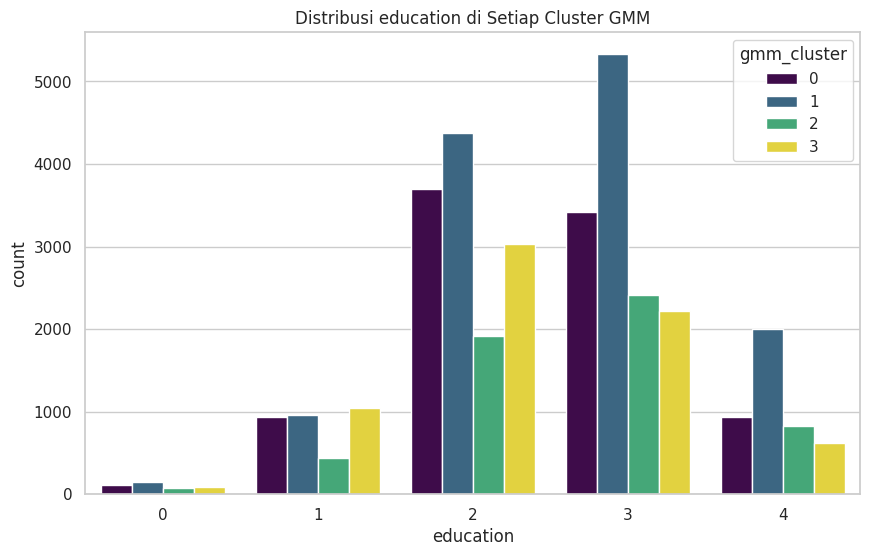

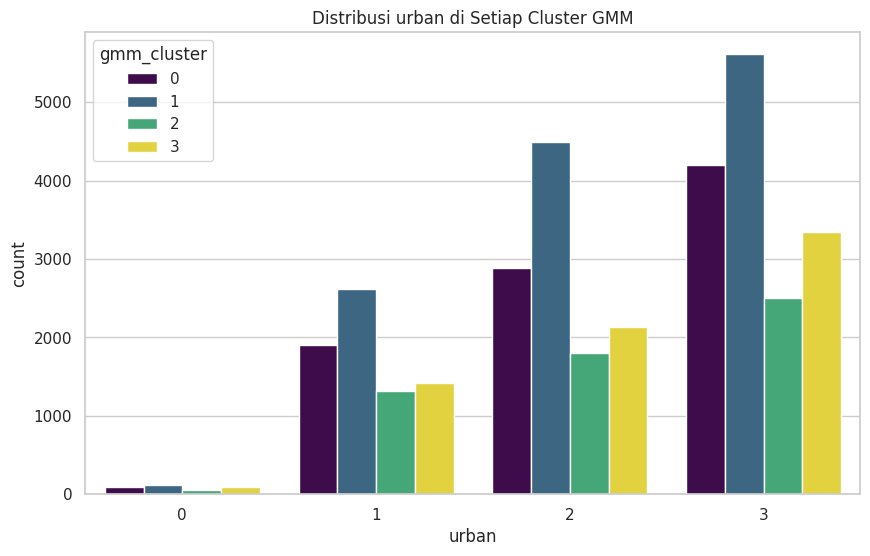

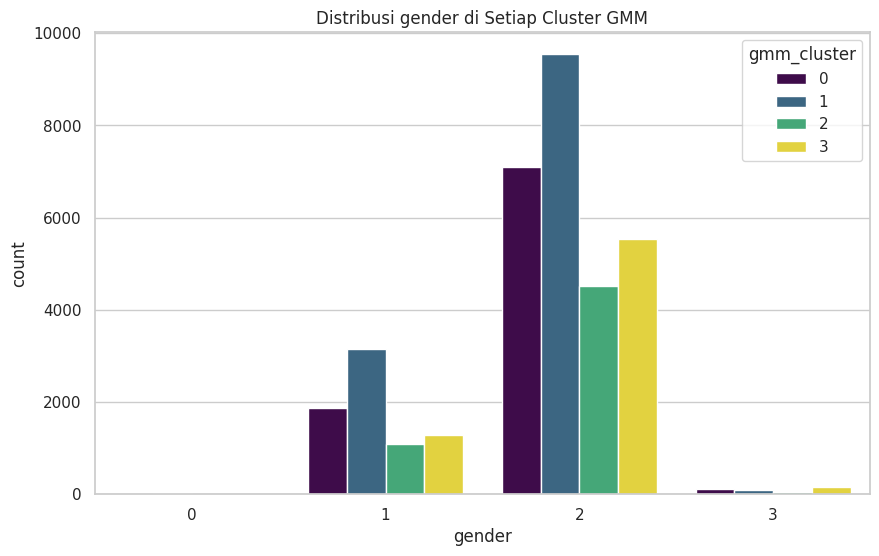

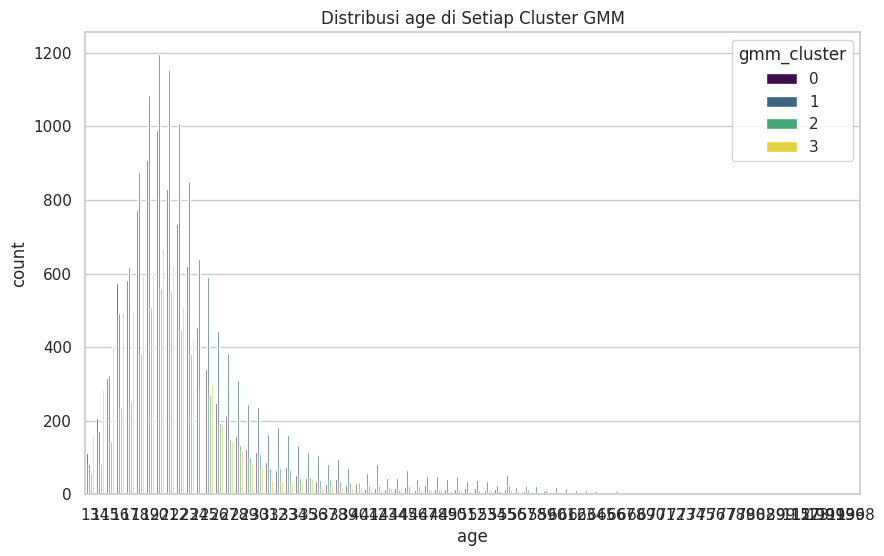

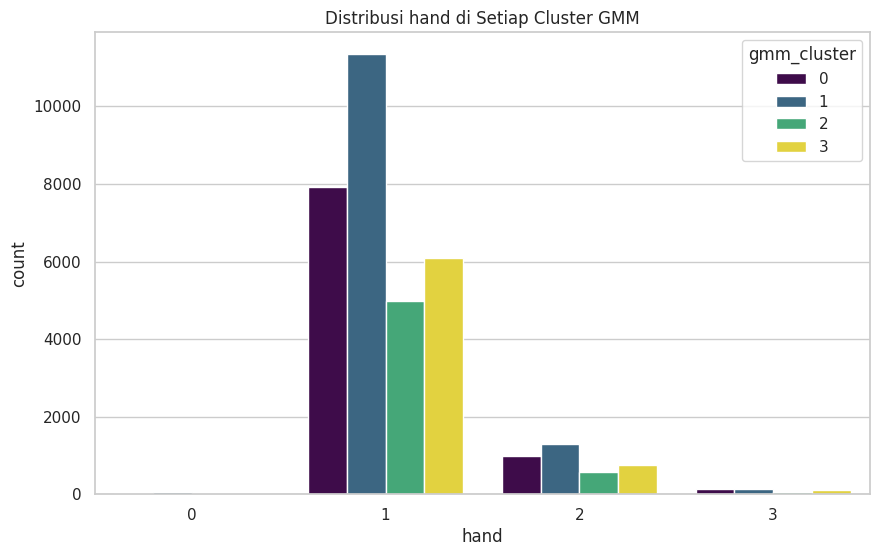

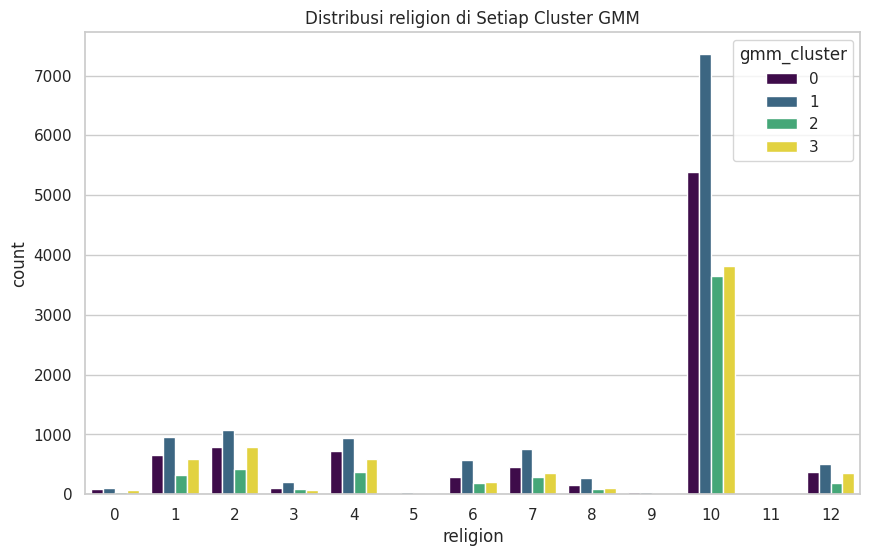

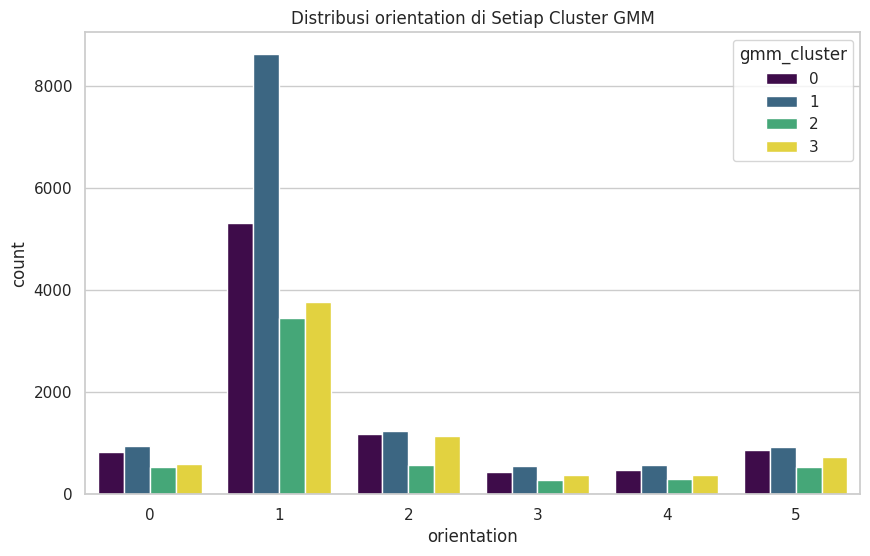

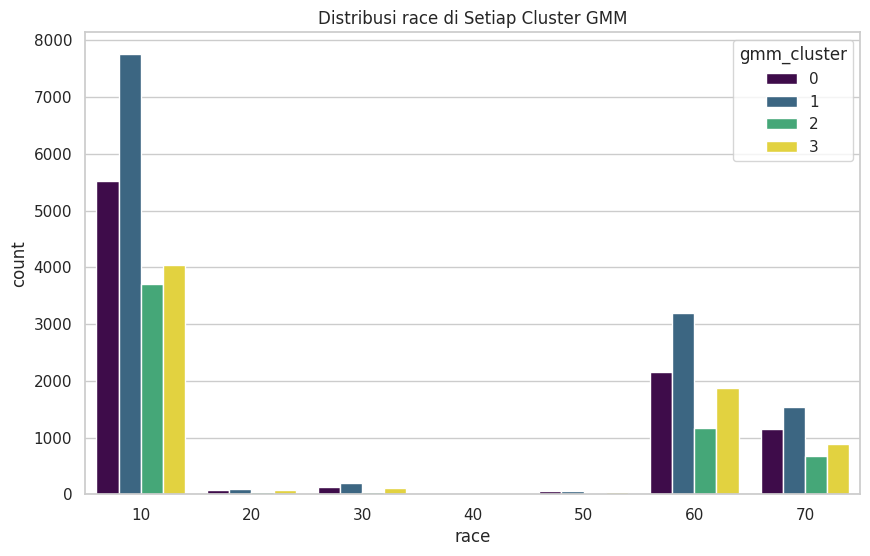

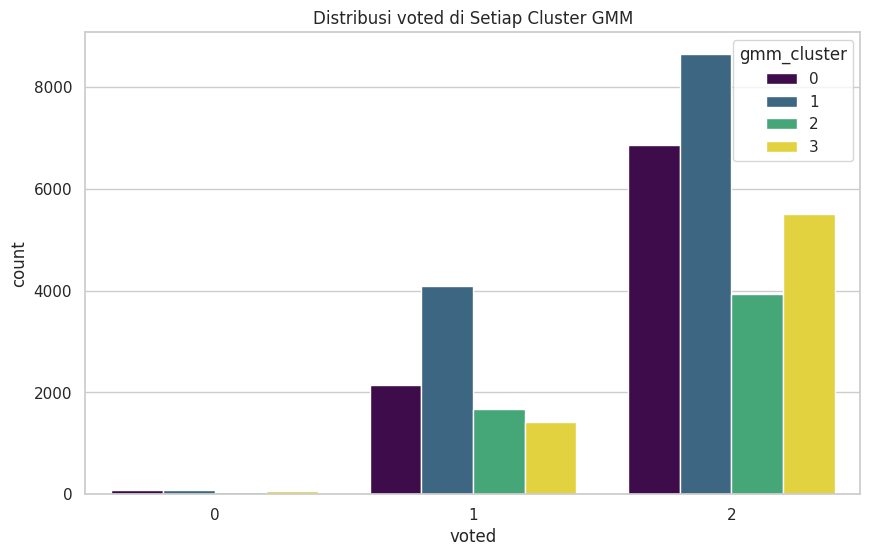

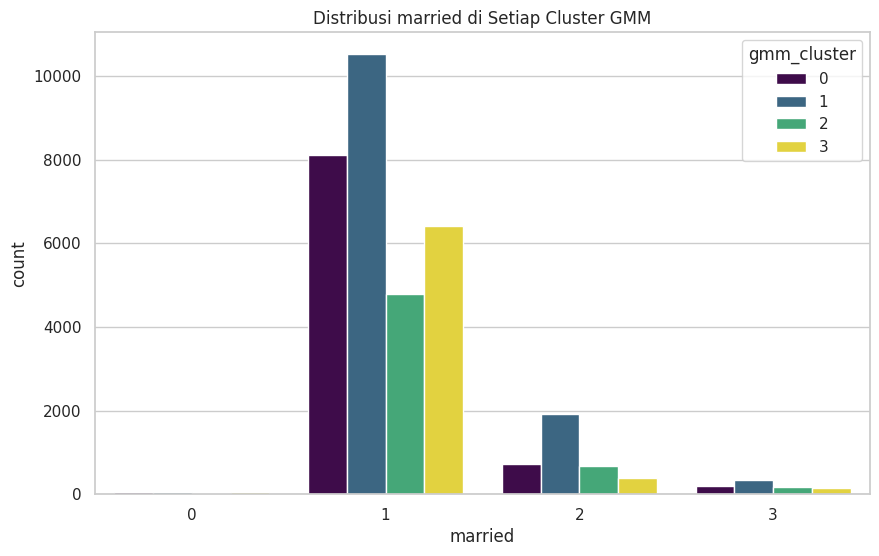

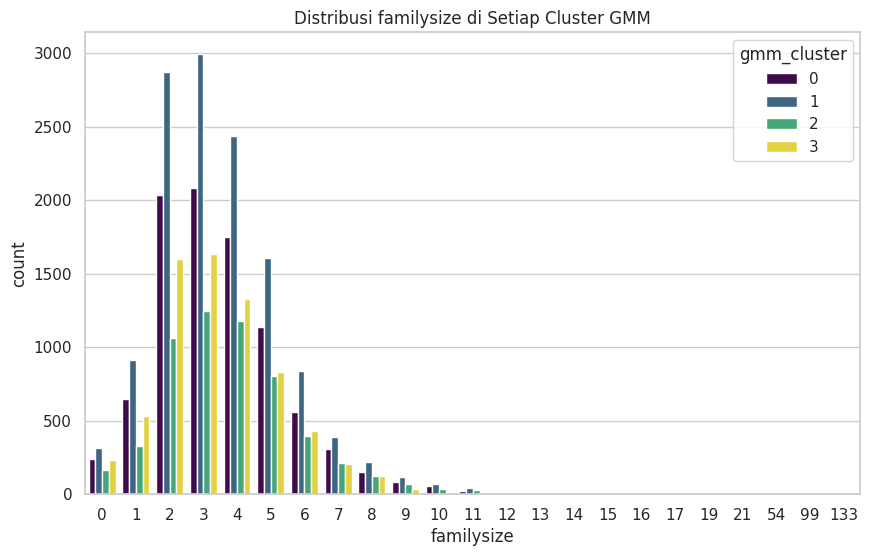

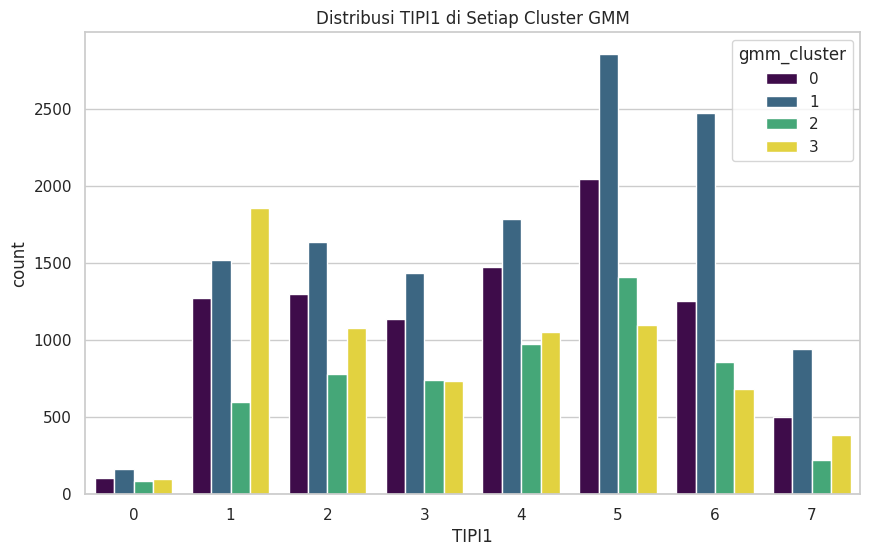

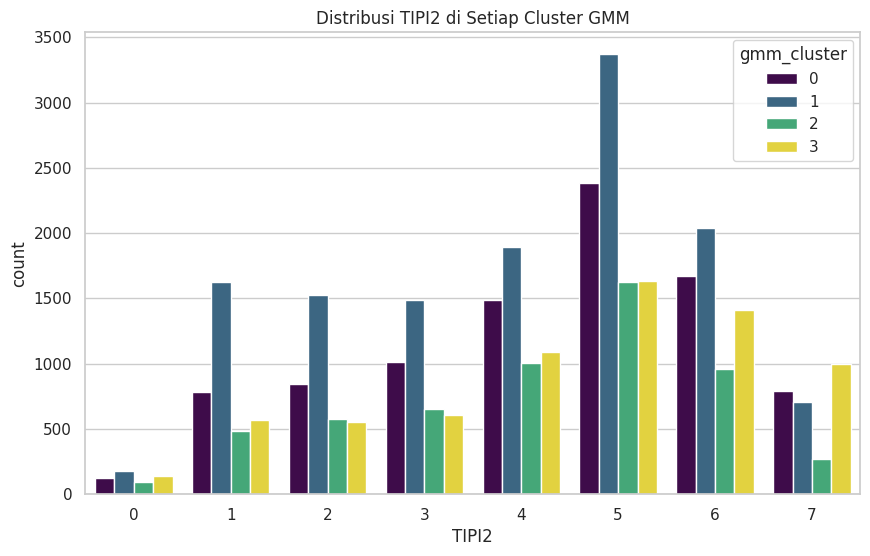

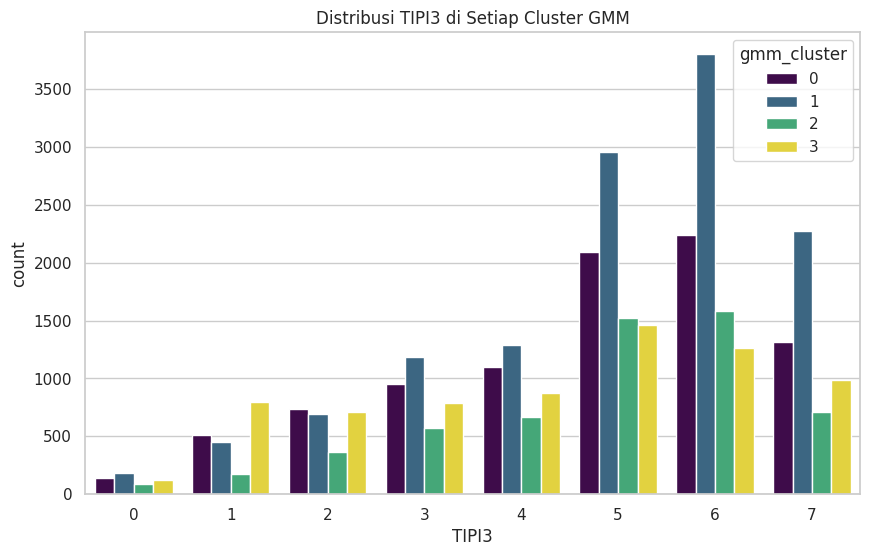

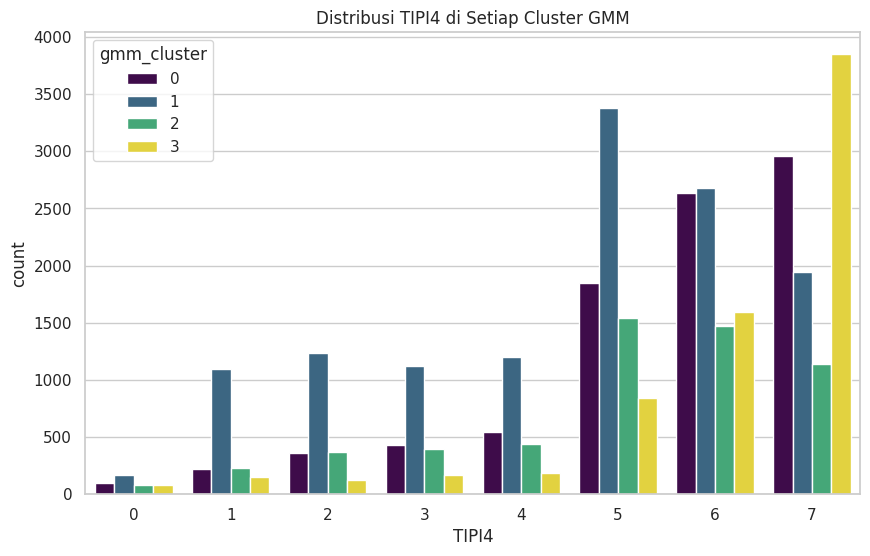

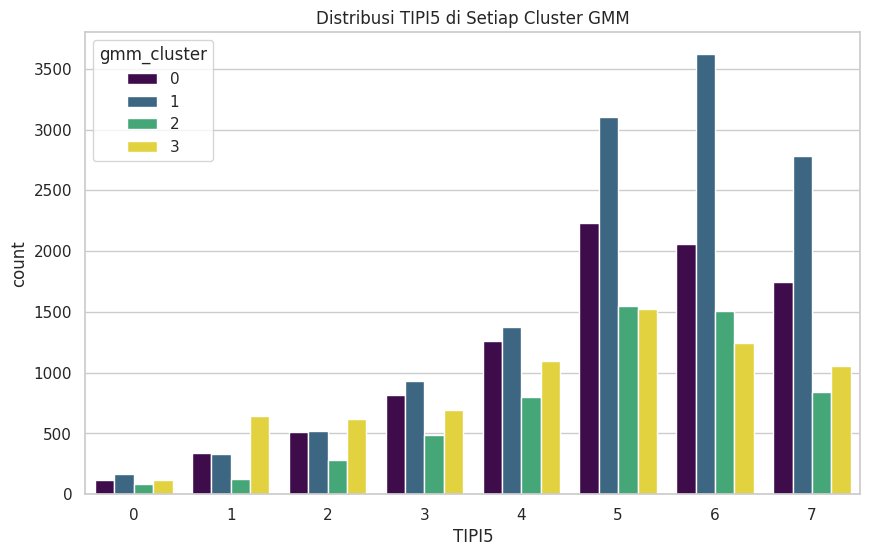

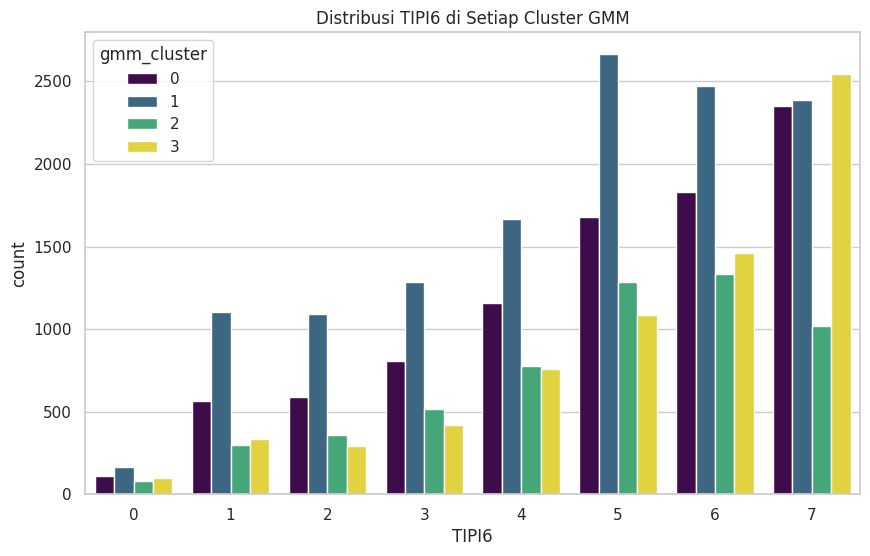

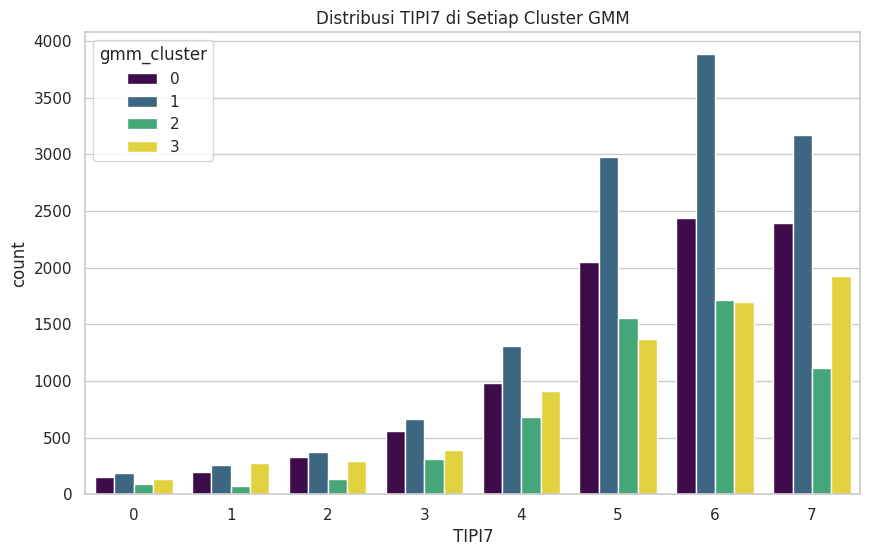

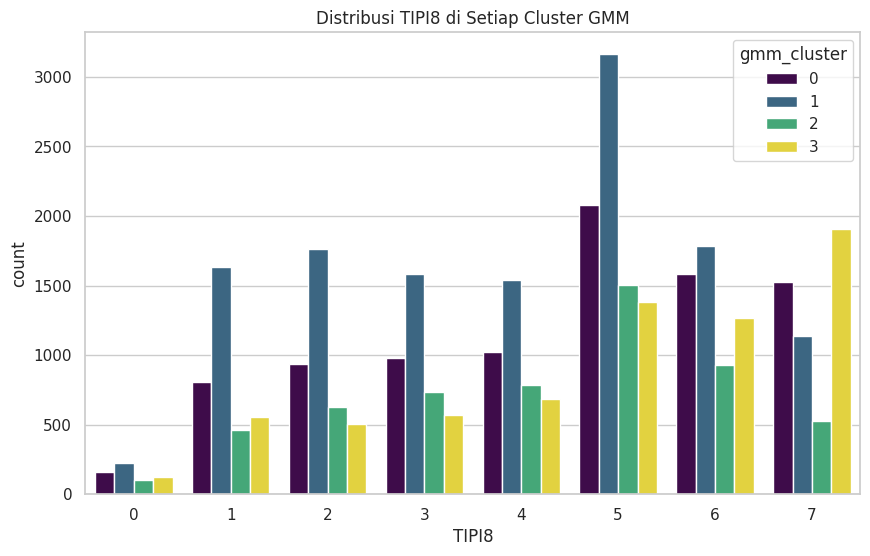

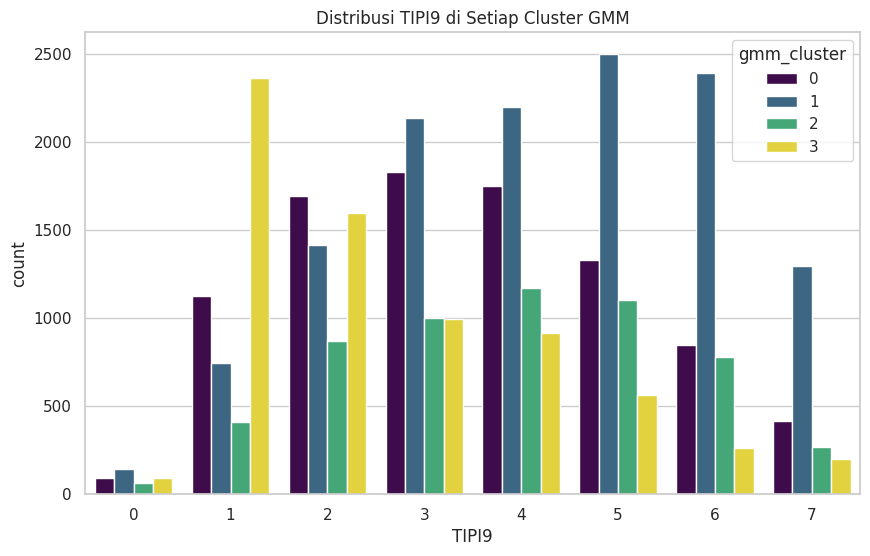

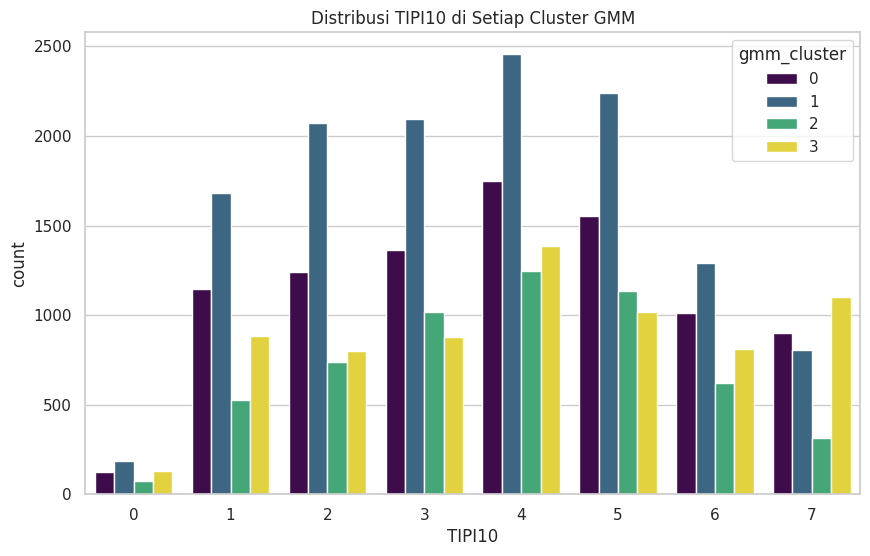

In [ ]:
print("\n--- Analisis Profil Demografi & Kepribadian GMM (SIAPA orangnya?) ---")

# Visualisasi Fitur Numerik dengan Box Plot untuk GMM
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Distribusi Demografi & Kepribadian per Cluster GMM', fontsize=18)

sns.boxplot(x='gmm_cluster', y='age', data=df_finish, ax=axes[0, 0]).set_title('Distribusi Usia')
sns.boxplot(x='gmm_cluster', y='TIPI4', data=df_finish, ax=axes[0, 1]).set_title('Distribusi Kepribadian "Cemas, Mudah Kesal"')
sns.boxplot(x='gmm_cluster', y='TIPI9', data=df_finish, ax=axes[1, 0]).set_title('Distribusi Kepribadian "Tenang, Stabil"')
sns.boxplot(x='gmm_cluster', y='education', data=df_finish, ax=axes[1, 1]).set_title('Distribusi Tingkat Pendidikan')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Visualisasi Fitur Kategorikal dengan Count Plot untuk GMM
for col in profiling_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='gmm_cluster', data=df_finish, palette='viridis')
    plt.title(f'Distribusi {col} di Setiap Cluster GMM')
    plt.show()

# Evaluasi dan Visualisasi Hasil Clustering

[KMeans] Silhouette Score         : 0.125
[KMeans] Calinski-Harabasz Index  : 8228.312
[GMM]    Silhouette Score         : 0.014
[GMM]    Calinski-Harabasz Index  : 3190.464


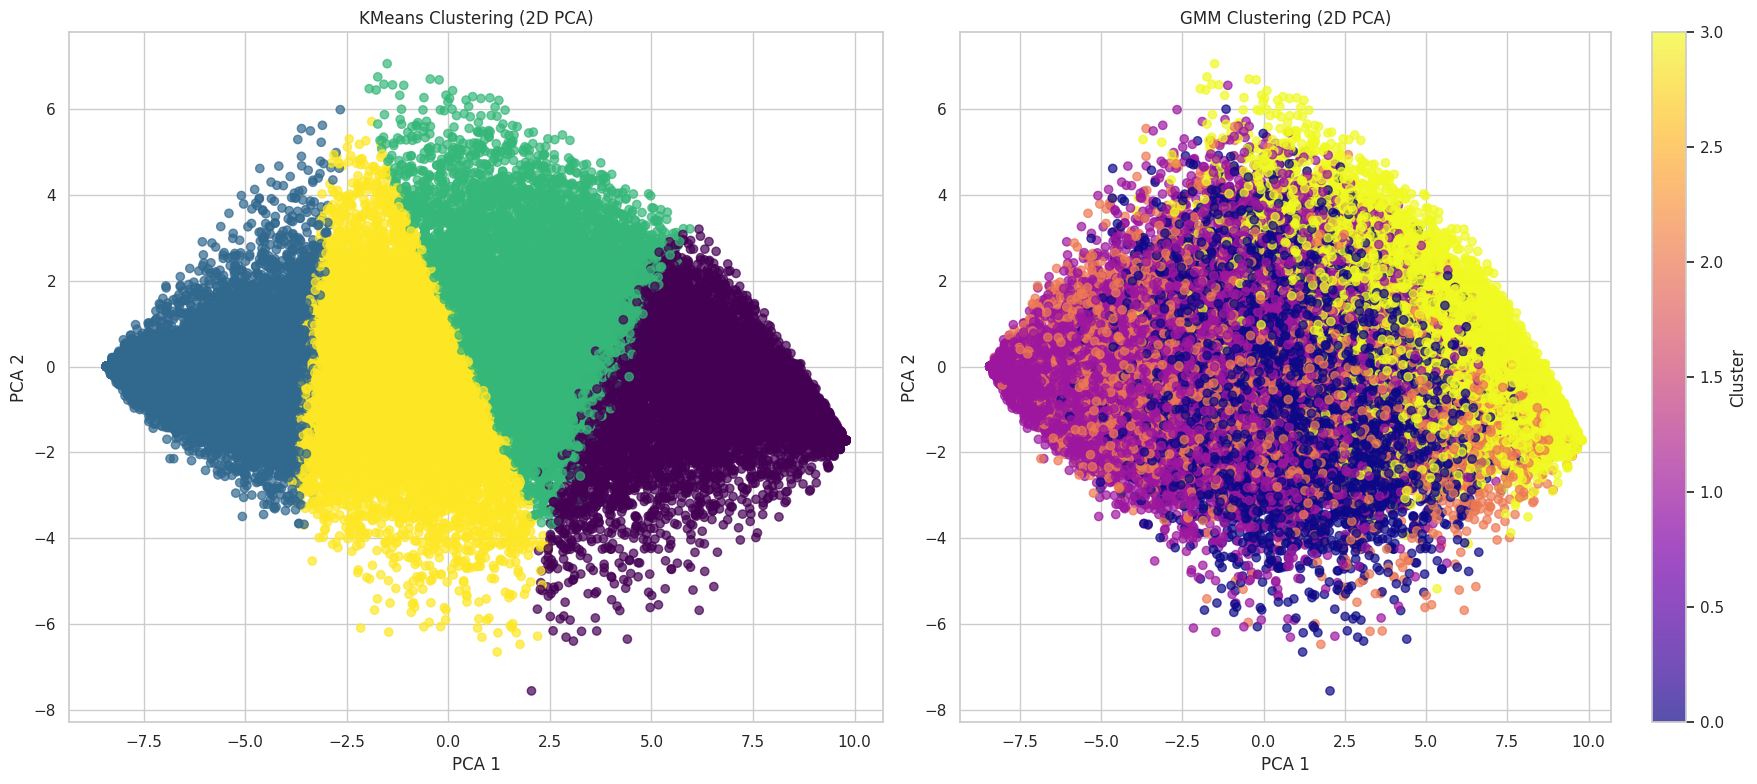

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA untuk visualisasi 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Evaluasi KMeans
sil_kmeans = silhouette_score(X_scaled, kmeans_labels)
cal_kmeans = calinski_harabasz_score(X_scaled, kmeans_labels)

# Evaluasi GMM
sil_gmm = silhouette_score(X_scaled, gmm_labels)
cal_gmm = calinski_harabasz_score(X_scaled, gmm_labels)

# Tampilkan hasil evaluasi
print(f"[KMeans] Silhouette Score         : {sil_kmeans:.3f}")
print(f"[KMeans] Calinski-Harabasz Index  : {cal_kmeans:.3f}")
print(f"[GMM]    Silhouette Score         : {sil_gmm:.3f}")
print(f"[GMM]    Calinski-Harabasz Index  : {cal_gmm:.3f}")

# Visualisasi KMeans dan GMM secara berdampingan
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# KMeans Plot
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
axes[0].set_title("KMeans Clustering (2D PCA)")
axes[0].set_xlabel("PCA 1")
axes[0].set_ylabel("PCA 2")
axes[0].grid(True)

# GMM Plot
scatter = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='plasma', alpha=0.7)
axes[1].set_title("GMM Clustering (2D PCA)")
axes[1].set_xlabel("PCA 1")
axes[1].set_ylabel("PCA 2")
axes[1].grid(True)

# Colorbar untuk GMM
fig.colorbar(scatter, ax=axes[1], label="Cluster")

plt.tight_layout()
plt.show()